In [2]:
# Master File for Offline Studies on Muon System LLP Decays (sans clustering)

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Meant for testing WH

# Action Plan
#

# Notes/Conclusions
# @nasurijr: Barrel acceptance (theoretical rationale, data supports acceptance trend)

In [3]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [4]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

donotdelete = []

Welcome to JupyROOT 6.18/00


# Read in and Extract TTrees from Datafiles

In [5]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'
# # Complete set run via CRAB on llp_ntupler
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# # WH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-06 10:55:13.587176-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-08-06 10:55:13.747771-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root
2019-08-06 10:55:16.844956-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-06 10:55:17.063908-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-06 10:55:17.253089-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-06 10:55:17.443235-07:00
m55ct10000mm_plus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WplusH_

## Name TTree Objects

In [6]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
# T_minBias = tree['zeroBias']
T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

## Jet Pt Calculations

In [7]:
#get first jet pt per event
first_jet_pt = [x[0] if len(x) else -1 for x in T_m15_ct10['jetPt'].array()]

#get max jet pt per event
max_jet_pt = [np.max(np.abs(x)) if len(x) else -1 for x in T_m15_ct10['gLLP_decay_vertex_z'].array()]

#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T_m15_ct10['jetPt'].array():
    if len(x) == 0:
        break
    first_jet_pt_arr.append(x[0])

# Define Variables and Name Datafiles 

In [235]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}

In [236]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
data_trees = {'m15ct10m_wh_bbbb': T_m15_ct10, 'm40ct10m_wh_bbbb': T_m40_ct10, 'm55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}

# Event Selection

In [237]:
# print(T_bkg['nCsc'].array())

# # for ev in range(len(T_wh['nCsc'].array())):
# gParticleMotherId = T_wh['gParticleMotherId'].array()
# gParticleId = T_wh['gParticleId'].array()
# gParticleStatus = T_wh['gParticleStatus'].array()
# # print(gParticleId)
# counter = 0
# # print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24)))
# ele_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# mu_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 11, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# for ev in np.logical_or(ele_sel, mu_sel):
#     if ev.any():
#         counter +=1
# print(counter)
# print(len(gParticleId))
# print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 ))

## TBranch -> np.array() Conversion

In [238]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
#         mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
#         for ev in np.logical_or(ele_sel, mu_sel):
        for ev in ele_sel:
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])>100)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
#         sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
#         sel_bkg = np.logical_and(sel_bkg, sel_lepton)
#         sel_bool[species] = sel_bkg
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-06 19:26:52.010422-07:00
m15ct10m_wh_bbbb: 2019-08-06 19:26:52.432660-07:00
m40ct10m_wh_bbbb: 2019-08-06 19:26:52.860098-07:00
m55ct10m_wh_bbbb_minus: 2019-08-06 19:26:53.285142-07:00
m55ct10m_wh_bbbb_plus: 2019-08-06 19:26:53.726142-07:00
WJetsToLNu: 2019-08-06 19:26:54.675079-07:00


In [239]:
print(sel_bool)
print(data_trees)

{'m15ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm40ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_minus': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_plus': array([False, False, False, ..., False, False, False]), 'WJetsToLNu': array([ True,  True,  True, ...,  True,  True,  True])}
{'m15ct10m_wh_bbbb': <TTree b'llp' at 0x7fb039ea9f60>, 'm40ct10m_wh_bbbb': <TTree b'llp' at 0x7fb02d3cfeb8>, 'm55ct10m_wh_bbbb_minus': <TTree b'llp' at 0x7fb01ff32b70>, 'm55ct10m_wh_bbbb_plus': <TTree b'llp' at 0x7fb0049a9fd0>, 'WJetsToLNu': <TTree b'llp' at 0x7fc838b99ac8>}


In [240]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]

    # Gen-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
    met_pt[species] = arbor['metType1Pt'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-06 19:26:54.907936-07:00
m15ct10m_wh_bbbb: 2019-08-06 19:26:55.000150-07:00
m40ct10m_wh_bbbb: 2019-08-06 19:26:55.113380-07:00
m55ct10m_wh_bbbb_minus: 2019-08-06 19:26:55.235584-07:00
m55ct10m_wh_bbbb_plus: 2019-08-06 19:26:55.356026-07:00
WJetsToLNu: 2019-08-06 19:27:48.932439-07:00


In [241]:
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

## Endcap Hit Removal

In [242]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-06 19:27:49.419541-07:00
m15ct10m_wh_bbbb: 2019-08-06 19:27:49.650456-07:00
0: 2019-08-06 19:27:49.651960-07:00
1000: 2019-08-06 19:27:50.285581-07:00
m40ct10m_wh_bbbb: 2019-08-06 19:27:50.343886-07:00
0: 2019-08-06 19:27:50.345090-07:00
1000: 2019-08-06 19:27:51.029054-07:00
m55ct10m_wh_bbbb_minus: 2019-08-06 19:27:51.265612-07:00
0: 2019-08-06 19:27:51.265963-07:00
1000: 2019-08-06 19:27:51.964409-07:00
m55ct10m_wh_bbbb_plus: 2019-08-06 19:27:52.108362-07:00
0: 2019-08-06 19:27:52.108544-07:00
1000: 2019-08-06 19:27:52.227881-07:00
2000: 2019-08-06 19:27:52.351183-07:00
3000: 2019-08-06 19:27:52.471104-07:00
4000: 2019-08-06 19:27:52.591387-07:00
5000: 2019-08-06 19:27:52.722269-07:00
6000: 2019-08-06 19:27:52.842236-07:00
7000: 2019-08-06 19:27:52.965589-07:00
8000: 2019-08-06 19:27:53.085694-07:00
9000: 2019-08-06 19:27:53.206823-07:00
10000: 2019-08-06 19:27:53.327314-07:00
11000: 2019-08-06 19:27:53.445899-07:00
12000: 2019-08-06 19:27:53.569328-07:00
13000: 2019-08-06

192000: 2019-08-06 19:28:15.772955-07:00
193000: 2019-08-06 19:28:15.893030-07:00
194000: 2019-08-06 19:28:16.011623-07:00
195000: 2019-08-06 19:28:16.130262-07:00
196000: 2019-08-06 19:28:16.253645-07:00
197000: 2019-08-06 19:28:16.376797-07:00
198000: 2019-08-06 19:28:16.498694-07:00
199000: 2019-08-06 19:28:16.617925-07:00
200000: 2019-08-06 19:28:16.740823-07:00
201000: 2019-08-06 19:28:16.864431-07:00
202000: 2019-08-06 19:28:16.985474-07:00
203000: 2019-08-06 19:28:17.109047-07:00
204000: 2019-08-06 19:28:17.230742-07:00
205000: 2019-08-06 19:28:17.353308-07:00
206000: 2019-08-06 19:28:17.476339-07:00
207000: 2019-08-06 19:28:17.597872-07:00
208000: 2019-08-06 19:28:17.719467-07:00
209000: 2019-08-06 19:28:17.842233-07:00
210000: 2019-08-06 19:28:17.967259-07:00
211000: 2019-08-06 19:28:18.087021-07:00
212000: 2019-08-06 19:28:18.206543-07:00
213000: 2019-08-06 19:28:18.332087-07:00
214000: 2019-08-06 19:28:18.453070-07:00
215000: 2019-08-06 19:28:18.572323-07:00
216000: 2019-08-

392000: 2019-08-06 19:28:40.290696-07:00
393000: 2019-08-06 19:28:40.414524-07:00
394000: 2019-08-06 19:28:40.537688-07:00
395000: 2019-08-06 19:28:40.659201-07:00
396000: 2019-08-06 19:28:40.781787-07:00
397000: 2019-08-06 19:28:40.902533-07:00
398000: 2019-08-06 19:28:41.028964-07:00
399000: 2019-08-06 19:28:41.151230-07:00
400000: 2019-08-06 19:28:41.272206-07:00
401000: 2019-08-06 19:28:41.388426-07:00
402000: 2019-08-06 19:28:41.513025-07:00
403000: 2019-08-06 19:28:41.638722-07:00
404000: 2019-08-06 19:28:41.760024-07:00
405000: 2019-08-06 19:28:41.883676-07:00
406000: 2019-08-06 19:28:42.005021-07:00
407000: 2019-08-06 19:28:42.132404-07:00
408000: 2019-08-06 19:28:42.254333-07:00
409000: 2019-08-06 19:28:42.378854-07:00
410000: 2019-08-06 19:28:42.507874-07:00
411000: 2019-08-06 19:28:42.630921-07:00
412000: 2019-08-06 19:28:42.757322-07:00
413000: 2019-08-06 19:28:42.878062-07:00
414000: 2019-08-06 19:28:43.000225-07:00
415000: 2019-08-06 19:28:43.125797-07:00
416000: 2019-08-

593000: 2019-08-06 19:29:04.948503-07:00
594000: 2019-08-06 19:29:05.066480-07:00
595000: 2019-08-06 19:29:05.183099-07:00
596000: 2019-08-06 19:29:05.304134-07:00
597000: 2019-08-06 19:29:05.426102-07:00
598000: 2019-08-06 19:29:05.550316-07:00
599000: 2019-08-06 19:29:05.670326-07:00
600000: 2019-08-06 19:29:05.793943-07:00
601000: 2019-08-06 19:29:05.913829-07:00
602000: 2019-08-06 19:29:06.035199-07:00
603000: 2019-08-06 19:29:06.158126-07:00
604000: 2019-08-06 19:29:06.280139-07:00
605000: 2019-08-06 19:29:06.403000-07:00
606000: 2019-08-06 19:29:06.523548-07:00
607000: 2019-08-06 19:29:06.646387-07:00
608000: 2019-08-06 19:29:06.765963-07:00
609000: 2019-08-06 19:29:06.889644-07:00
610000: 2019-08-06 19:29:07.013134-07:00
611000: 2019-08-06 19:29:07.134813-07:00
612000: 2019-08-06 19:29:07.255174-07:00
613000: 2019-08-06 19:29:07.376359-07:00
614000: 2019-08-06 19:29:07.499350-07:00
615000: 2019-08-06 19:29:07.624588-07:00
616000: 2019-08-06 19:29:07.747174-07:00
617000: 2019-08-

794000: 2019-08-06 19:29:29.484599-07:00
795000: 2019-08-06 19:29:29.602547-07:00
796000: 2019-08-06 19:29:29.720868-07:00
797000: 2019-08-06 19:29:29.842042-07:00
798000: 2019-08-06 19:29:29.962506-07:00
799000: 2019-08-06 19:29:30.083995-07:00
800000: 2019-08-06 19:29:30.205197-07:00
801000: 2019-08-06 19:29:30.326442-07:00
802000: 2019-08-06 19:29:30.445966-07:00
803000: 2019-08-06 19:29:30.570583-07:00
804000: 2019-08-06 19:29:30.694311-07:00
805000: 2019-08-06 19:29:30.817324-07:00
806000: 2019-08-06 19:29:30.943217-07:00
807000: 2019-08-06 19:29:31.059018-07:00
808000: 2019-08-06 19:29:31.183741-07:00
809000: 2019-08-06 19:29:31.307858-07:00
810000: 2019-08-06 19:29:31.429387-07:00
811000: 2019-08-06 19:29:31.549799-07:00
812000: 2019-08-06 19:29:31.670699-07:00
813000: 2019-08-06 19:29:31.795281-07:00
814000: 2019-08-06 19:29:31.917411-07:00
815000: 2019-08-06 19:29:32.037544-07:00
816000: 2019-08-06 19:29:32.157772-07:00
817000: 2019-08-06 19:29:32.284069-07:00
818000: 2019-08-

996000: 2019-08-06 19:29:54.125036-07:00
997000: 2019-08-06 19:29:54.249735-07:00
998000: 2019-08-06 19:29:54.369394-07:00
999000: 2019-08-06 19:29:54.489753-07:00
1000000: 2019-08-06 19:29:54.613937-07:00
1001000: 2019-08-06 19:29:54.735572-07:00
1002000: 2019-08-06 19:29:54.857962-07:00
1003000: 2019-08-06 19:29:54.977083-07:00
1004000: 2019-08-06 19:29:55.096131-07:00
1005000: 2019-08-06 19:29:55.221572-07:00
1006000: 2019-08-06 19:29:55.345296-07:00
1007000: 2019-08-06 19:29:55.468227-07:00
1008000: 2019-08-06 19:29:55.590546-07:00
1009000: 2019-08-06 19:29:55.712103-07:00
1010000: 2019-08-06 19:29:55.837189-07:00
1011000: 2019-08-06 19:29:55.961879-07:00
1012000: 2019-08-06 19:29:56.083770-07:00
1013000: 2019-08-06 19:29:56.205056-07:00
1014000: 2019-08-06 19:29:56.327416-07:00
1015000: 2019-08-06 19:29:56.448205-07:00
1016000: 2019-08-06 19:29:56.573414-07:00
1017000: 2019-08-06 19:29:56.700082-07:00
1018000: 2019-08-06 19:29:56.831819-07:00
1019000: 2019-08-06 19:29:56.955585-07

1192000: 2019-08-06 19:30:18.134543-07:00
1193000: 2019-08-06 19:30:18.258149-07:00
1194000: 2019-08-06 19:30:18.379970-07:00
1195000: 2019-08-06 19:30:18.501510-07:00
1196000: 2019-08-06 19:30:18.622022-07:00
1197000: 2019-08-06 19:30:18.745466-07:00
1198000: 2019-08-06 19:30:18.868165-07:00
1199000: 2019-08-06 19:30:18.990688-07:00
1200000: 2019-08-06 19:30:19.110807-07:00
1201000: 2019-08-06 19:30:19.230361-07:00
1202000: 2019-08-06 19:30:19.349145-07:00
1203000: 2019-08-06 19:30:19.471086-07:00
1204000: 2019-08-06 19:30:19.594962-07:00
1205000: 2019-08-06 19:30:19.713015-07:00
1206000: 2019-08-06 19:30:19.832941-07:00
1207000: 2019-08-06 19:30:19.953807-07:00
1208000: 2019-08-06 19:30:20.073540-07:00
1209000: 2019-08-06 19:30:20.194144-07:00
1210000: 2019-08-06 19:30:20.316401-07:00
1211000: 2019-08-06 19:30:20.436609-07:00
1212000: 2019-08-06 19:30:20.562552-07:00
1213000: 2019-08-06 19:30:20.681497-07:00
1214000: 2019-08-06 19:30:20.799541-07:00
1215000: 2019-08-06 19:30:20.91713

1388000: 2019-08-06 19:30:42.025011-07:00
1389000: 2019-08-06 19:30:42.147329-07:00
1390000: 2019-08-06 19:30:42.273661-07:00
1391000: 2019-08-06 19:30:42.394399-07:00
1392000: 2019-08-06 19:30:42.513413-07:00
1393000: 2019-08-06 19:30:42.634716-07:00
1394000: 2019-08-06 19:30:42.754893-07:00
1395000: 2019-08-06 19:30:42.879874-07:00
1396000: 2019-08-06 19:30:43.003767-07:00
1397000: 2019-08-06 19:30:43.125866-07:00
1398000: 2019-08-06 19:30:43.248148-07:00
1399000: 2019-08-06 19:30:43.367320-07:00
1400000: 2019-08-06 19:30:43.489120-07:00
1401000: 2019-08-06 19:30:43.609478-07:00
1402000: 2019-08-06 19:30:43.730971-07:00
1403000: 2019-08-06 19:30:43.853190-07:00
1404000: 2019-08-06 19:30:43.977338-07:00
1405000: 2019-08-06 19:30:44.099271-07:00
1406000: 2019-08-06 19:30:44.221042-07:00
1407000: 2019-08-06 19:30:44.343822-07:00
1408000: 2019-08-06 19:30:44.464517-07:00
1409000: 2019-08-06 19:30:44.588166-07:00
1410000: 2019-08-06 19:30:44.709726-07:00
1411000: 2019-08-06 19:30:44.82689

1585000: 2019-08-06 19:31:06.058015-07:00
1586000: 2019-08-06 19:31:06.181138-07:00
1587000: 2019-08-06 19:31:06.305306-07:00
1588000: 2019-08-06 19:31:06.426039-07:00
1589000: 2019-08-06 19:31:06.548246-07:00
1590000: 2019-08-06 19:31:06.673679-07:00
1591000: 2019-08-06 19:31:06.797913-07:00
1592000: 2019-08-06 19:31:06.917263-07:00
1593000: 2019-08-06 19:31:07.037002-07:00
1594000: 2019-08-06 19:31:07.162228-07:00
1595000: 2019-08-06 19:31:07.285211-07:00
1596000: 2019-08-06 19:31:07.406907-07:00
1597000: 2019-08-06 19:31:07.530769-07:00
1598000: 2019-08-06 19:31:07.652552-07:00
1599000: 2019-08-06 19:31:07.774870-07:00
1600000: 2019-08-06 19:31:07.899778-07:00
1601000: 2019-08-06 19:31:08.021225-07:00
1602000: 2019-08-06 19:31:08.144093-07:00
1603000: 2019-08-06 19:31:08.265068-07:00
1604000: 2019-08-06 19:31:08.386956-07:00
1605000: 2019-08-06 19:31:08.513436-07:00
1606000: 2019-08-06 19:31:08.633266-07:00
1607000: 2019-08-06 19:31:08.753917-07:00
1608000: 2019-08-06 19:31:08.87705

1782000: 2019-08-06 19:31:30.083802-07:00
1783000: 2019-08-06 19:31:30.202249-07:00
1784000: 2019-08-06 19:31:30.321555-07:00
1785000: 2019-08-06 19:31:30.445359-07:00
1786000: 2019-08-06 19:31:30.565197-07:00
1787000: 2019-08-06 19:31:30.683480-07:00
1788000: 2019-08-06 19:31:30.812477-07:00
1789000: 2019-08-06 19:31:30.932601-07:00
1790000: 2019-08-06 19:31:31.056280-07:00
1791000: 2019-08-06 19:31:31.176342-07:00
1792000: 2019-08-06 19:31:31.295991-07:00
1793000: 2019-08-06 19:31:31.419827-07:00
1794000: 2019-08-06 19:31:31.540248-07:00
1795000: 2019-08-06 19:31:31.664716-07:00
1796000: 2019-08-06 19:31:31.783052-07:00
1797000: 2019-08-06 19:31:31.902153-07:00
1798000: 2019-08-06 19:31:32.021925-07:00
1799000: 2019-08-06 19:31:32.143705-07:00
1800000: 2019-08-06 19:31:32.262142-07:00
1801000: 2019-08-06 19:31:32.381147-07:00
1802000: 2019-08-06 19:31:32.500121-07:00
1803000: 2019-08-06 19:31:32.624541-07:00
1804000: 2019-08-06 19:31:32.744660-07:00
1805000: 2019-08-06 19:31:32.86605

1980000: 2019-08-06 19:31:54.169808-07:00
1981000: 2019-08-06 19:31:54.290568-07:00
1982000: 2019-08-06 19:31:54.416128-07:00
1983000: 2019-08-06 19:31:54.536857-07:00
1984000: 2019-08-06 19:31:54.660164-07:00
1985000: 2019-08-06 19:31:54.782112-07:00
1986000: 2019-08-06 19:31:54.903506-07:00
1987000: 2019-08-06 19:31:55.026529-07:00
1988000: 2019-08-06 19:31:55.148352-07:00
1989000: 2019-08-06 19:31:55.267092-07:00
1990000: 2019-08-06 19:31:55.386463-07:00
1991000: 2019-08-06 19:31:55.507120-07:00
1992000: 2019-08-06 19:31:55.630293-07:00
1993000: 2019-08-06 19:31:55.749595-07:00
1994000: 2019-08-06 19:31:55.874358-07:00
1995000: 2019-08-06 19:31:55.995563-07:00
1996000: 2019-08-06 19:31:56.115006-07:00
1997000: 2019-08-06 19:31:56.238482-07:00
1998000: 2019-08-06 19:31:56.360009-07:00
1999000: 2019-08-06 19:31:56.478014-07:00
2000000: 2019-08-06 19:31:56.599342-07:00
2001000: 2019-08-06 19:31:56.721152-07:00
2002000: 2019-08-06 19:31:56.844018-07:00
2003000: 2019-08-06 19:31:56.96445

2177000: 2019-08-06 19:32:18.263935-07:00
2178000: 2019-08-06 19:32:18.389095-07:00
2179000: 2019-08-06 19:32:18.507713-07:00
2180000: 2019-08-06 19:32:18.633620-07:00
2181000: 2019-08-06 19:32:18.753270-07:00
2182000: 2019-08-06 19:32:18.874834-07:00
2183000: 2019-08-06 19:32:18.999823-07:00
2184000: 2019-08-06 19:32:19.124642-07:00
2185000: 2019-08-06 19:32:19.248225-07:00
2186000: 2019-08-06 19:32:19.373941-07:00
2187000: 2019-08-06 19:32:19.494900-07:00
2188000: 2019-08-06 19:32:19.620281-07:00
2189000: 2019-08-06 19:32:19.745275-07:00
2190000: 2019-08-06 19:32:19.867428-07:00
2191000: 2019-08-06 19:32:19.991060-07:00
2192000: 2019-08-06 19:32:20.108745-07:00
2193000: 2019-08-06 19:32:20.231513-07:00
2194000: 2019-08-06 19:32:20.353318-07:00
2195000: 2019-08-06 19:32:20.479763-07:00
2196000: 2019-08-06 19:32:20.603157-07:00
2197000: 2019-08-06 19:32:20.729675-07:00
2198000: 2019-08-06 19:32:20.852951-07:00
2199000: 2019-08-06 19:32:20.972529-07:00
2200000: 2019-08-06 19:32:21.09331

2374000: 2019-08-06 19:32:42.350166-07:00
2375000: 2019-08-06 19:32:42.469629-07:00
2376000: 2019-08-06 19:32:42.587936-07:00
2377000: 2019-08-06 19:32:42.712398-07:00
2378000: 2019-08-06 19:32:42.832763-07:00
2379000: 2019-08-06 19:32:42.955034-07:00
2380000: 2019-08-06 19:32:43.077231-07:00
2381000: 2019-08-06 19:32:43.199446-07:00
2382000: 2019-08-06 19:32:43.317398-07:00
2383000: 2019-08-06 19:32:43.437658-07:00
2384000: 2019-08-06 19:32:43.556271-07:00
2385000: 2019-08-06 19:32:43.674728-07:00
2386000: 2019-08-06 19:32:43.797050-07:00
2387000: 2019-08-06 19:32:43.919843-07:00
2388000: 2019-08-06 19:32:44.043229-07:00
2389000: 2019-08-06 19:32:44.168637-07:00
2390000: 2019-08-06 19:32:44.292180-07:00
2391000: 2019-08-06 19:32:44.415875-07:00
2392000: 2019-08-06 19:32:44.537185-07:00
2393000: 2019-08-06 19:32:44.656783-07:00
2394000: 2019-08-06 19:32:44.776806-07:00
2395000: 2019-08-06 19:32:44.903650-07:00
2396000: 2019-08-06 19:32:45.023267-07:00
2397000: 2019-08-06 19:32:45.14411

2571000: 2019-08-06 19:33:06.362943-07:00
2572000: 2019-08-06 19:33:06.482775-07:00
2573000: 2019-08-06 19:33:06.604081-07:00
2574000: 2019-08-06 19:33:06.725638-07:00
2575000: 2019-08-06 19:33:06.847741-07:00
2576000: 2019-08-06 19:33:06.971625-07:00
2577000: 2019-08-06 19:33:07.095314-07:00
2578000: 2019-08-06 19:33:07.220982-07:00
2579000: 2019-08-06 19:33:07.346365-07:00
2580000: 2019-08-06 19:33:07.463950-07:00
2581000: 2019-08-06 19:33:07.585129-07:00
2582000: 2019-08-06 19:33:07.709869-07:00
2583000: 2019-08-06 19:33:07.828857-07:00
2584000: 2019-08-06 19:33:07.948534-07:00
2585000: 2019-08-06 19:33:08.068822-07:00
2586000: 2019-08-06 19:33:08.190004-07:00
2587000: 2019-08-06 19:33:08.313770-07:00
2588000: 2019-08-06 19:33:08.432170-07:00
2589000: 2019-08-06 19:33:08.556081-07:00
2590000: 2019-08-06 19:33:08.675919-07:00
2591000: 2019-08-06 19:33:08.794316-07:00
2592000: 2019-08-06 19:33:08.917206-07:00
2593000: 2019-08-06 19:33:09.042320-07:00
2594000: 2019-08-06 19:33:09.16592

2767000: 2019-08-06 19:33:30.266263-07:00
2768000: 2019-08-06 19:33:30.385727-07:00
2769000: 2019-08-06 19:33:30.511342-07:00
2770000: 2019-08-06 19:33:30.634516-07:00
2771000: 2019-08-06 19:33:30.759140-07:00
2772000: 2019-08-06 19:33:30.880589-07:00
2773000: 2019-08-06 19:33:31.004606-07:00
2774000: 2019-08-06 19:33:31.123605-07:00
2775000: 2019-08-06 19:33:31.245998-07:00
2776000: 2019-08-06 19:33:31.371917-07:00
2777000: 2019-08-06 19:33:31.495251-07:00
2778000: 2019-08-06 19:33:31.615869-07:00
2779000: 2019-08-06 19:33:31.738649-07:00
2780000: 2019-08-06 19:33:31.858950-07:00
2781000: 2019-08-06 19:33:31.982057-07:00
2782000: 2019-08-06 19:33:32.109314-07:00
2783000: 2019-08-06 19:33:32.230867-07:00
2784000: 2019-08-06 19:33:32.354998-07:00
2785000: 2019-08-06 19:33:32.478642-07:00
2786000: 2019-08-06 19:33:32.601024-07:00
2787000: 2019-08-06 19:33:32.722201-07:00
2788000: 2019-08-06 19:33:32.843499-07:00
2789000: 2019-08-06 19:33:32.971115-07:00
2790000: 2019-08-06 19:33:33.09446

2964000: 2019-08-06 19:33:54.310247-07:00
2965000: 2019-08-06 19:33:54.429128-07:00
2966000: 2019-08-06 19:33:54.548428-07:00
2967000: 2019-08-06 19:33:54.668030-07:00
2968000: 2019-08-06 19:33:54.789585-07:00
2969000: 2019-08-06 19:33:54.909207-07:00
2970000: 2019-08-06 19:33:55.032025-07:00
2971000: 2019-08-06 19:33:55.151767-07:00
2972000: 2019-08-06 19:33:55.271407-07:00
2973000: 2019-08-06 19:33:55.389375-07:00
2974000: 2019-08-06 19:33:55.510455-07:00
2975000: 2019-08-06 19:33:55.634739-07:00
2976000: 2019-08-06 19:33:55.758926-07:00
2977000: 2019-08-06 19:33:55.884145-07:00
2978000: 2019-08-06 19:33:56.005972-07:00
2979000: 2019-08-06 19:33:56.128326-07:00
2980000: 2019-08-06 19:33:56.250160-07:00
2981000: 2019-08-06 19:33:56.370185-07:00
2982000: 2019-08-06 19:33:56.491442-07:00
2983000: 2019-08-06 19:33:56.615657-07:00
2984000: 2019-08-06 19:33:56.738137-07:00
2985000: 2019-08-06 19:33:56.853850-07:00
2986000: 2019-08-06 19:33:56.977493-07:00
2987000: 2019-08-06 19:33:57.10030

3160000: 2019-08-06 19:34:18.166315-07:00
3161000: 2019-08-06 19:34:18.287017-07:00
3162000: 2019-08-06 19:34:18.410587-07:00
3163000: 2019-08-06 19:34:18.536125-07:00
3164000: 2019-08-06 19:34:18.655717-07:00
3165000: 2019-08-06 19:34:18.781336-07:00
3166000: 2019-08-06 19:34:18.902846-07:00
3167000: 2019-08-06 19:34:19.024687-07:00
3168000: 2019-08-06 19:34:19.149315-07:00
3169000: 2019-08-06 19:34:19.272353-07:00
3170000: 2019-08-06 19:34:19.390815-07:00
3171000: 2019-08-06 19:34:19.513506-07:00
3172000: 2019-08-06 19:34:19.638155-07:00
3173000: 2019-08-06 19:34:19.759463-07:00
3174000: 2019-08-06 19:34:19.879575-07:00
3175000: 2019-08-06 19:34:20.002316-07:00
3176000: 2019-08-06 19:34:20.123791-07:00
3177000: 2019-08-06 19:34:20.241979-07:00
3178000: 2019-08-06 19:34:20.363738-07:00
3179000: 2019-08-06 19:34:20.485199-07:00
3180000: 2019-08-06 19:34:20.607574-07:00
3181000: 2019-08-06 19:34:20.726947-07:00
3182000: 2019-08-06 19:34:20.845561-07:00
3183000: 2019-08-06 19:34:20.96482

3357000: 2019-08-06 19:34:42.176963-07:00
3358000: 2019-08-06 19:34:42.298851-07:00
3359000: 2019-08-06 19:34:42.418074-07:00
3360000: 2019-08-06 19:34:42.538269-07:00
3361000: 2019-08-06 19:34:42.662232-07:00
3362000: 2019-08-06 19:34:42.784301-07:00
3363000: 2019-08-06 19:34:42.903777-07:00
3364000: 2019-08-06 19:34:43.028105-07:00
3365000: 2019-08-06 19:34:43.154044-07:00
3366000: 2019-08-06 19:34:43.278056-07:00
3367000: 2019-08-06 19:34:43.402023-07:00
3368000: 2019-08-06 19:34:43.526056-07:00
3369000: 2019-08-06 19:34:43.654290-07:00
3370000: 2019-08-06 19:34:43.774779-07:00
3371000: 2019-08-06 19:34:43.897482-07:00
3372000: 2019-08-06 19:34:44.020382-07:00
3373000: 2019-08-06 19:34:44.146128-07:00
3374000: 2019-08-06 19:34:44.269866-07:00
3375000: 2019-08-06 19:34:44.390161-07:00
3376000: 2019-08-06 19:34:44.514360-07:00
3377000: 2019-08-06 19:34:44.635447-07:00
3378000: 2019-08-06 19:34:44.756923-07:00
3379000: 2019-08-06 19:34:44.880636-07:00
3380000: 2019-08-06 19:34:45.00241

3554000: 2019-08-06 19:35:06.332507-07:00
3555000: 2019-08-06 19:35:06.453132-07:00
3556000: 2019-08-06 19:35:06.569963-07:00
3557000: 2019-08-06 19:35:06.694263-07:00
3558000: 2019-08-06 19:35:06.816111-07:00
3559000: 2019-08-06 19:35:06.941879-07:00
3560000: 2019-08-06 19:35:07.065295-07:00
3561000: 2019-08-06 19:35:07.185881-07:00
3562000: 2019-08-06 19:35:07.308527-07:00
3563000: 2019-08-06 19:35:07.429146-07:00
3564000: 2019-08-06 19:35:07.550655-07:00
3565000: 2019-08-06 19:35:07.672228-07:00
3566000: 2019-08-06 19:35:07.796971-07:00
3567000: 2019-08-06 19:35:07.920379-07:00
3568000: 2019-08-06 19:35:08.042194-07:00
3569000: 2019-08-06 19:35:08.167432-07:00
3570000: 2019-08-06 19:35:08.287260-07:00
3571000: 2019-08-06 19:35:08.415501-07:00
3572000: 2019-08-06 19:35:08.537522-07:00
3573000: 2019-08-06 19:35:08.660396-07:00
3574000: 2019-08-06 19:35:08.781278-07:00
3575000: 2019-08-06 19:35:08.900287-07:00
3576000: 2019-08-06 19:35:09.023294-07:00
3577000: 2019-08-06 19:35:09.14311

3750000: 2019-08-06 19:35:30.254790-07:00
3751000: 2019-08-06 19:35:30.375777-07:00
3752000: 2019-08-06 19:35:30.498450-07:00
3753000: 2019-08-06 19:35:30.621800-07:00
3754000: 2019-08-06 19:35:30.743850-07:00
3755000: 2019-08-06 19:35:30.867237-07:00
3756000: 2019-08-06 19:35:30.989981-07:00
3757000: 2019-08-06 19:35:31.112812-07:00
3758000: 2019-08-06 19:35:31.231068-07:00
3759000: 2019-08-06 19:35:31.353177-07:00
3760000: 2019-08-06 19:35:31.476343-07:00
3761000: 2019-08-06 19:35:31.599197-07:00
3762000: 2019-08-06 19:35:31.722610-07:00
3763000: 2019-08-06 19:35:31.847227-07:00
3764000: 2019-08-06 19:35:31.972124-07:00
3765000: 2019-08-06 19:35:32.094617-07:00
3766000: 2019-08-06 19:35:32.216979-07:00
3767000: 2019-08-06 19:35:32.339084-07:00
3768000: 2019-08-06 19:35:32.458349-07:00
3769000: 2019-08-06 19:35:32.580387-07:00
3770000: 2019-08-06 19:35:32.701158-07:00
3771000: 2019-08-06 19:35:32.824398-07:00
3772000: 2019-08-06 19:35:32.947711-07:00
3773000: 2019-08-06 19:35:33.07000

3948000: 2019-08-06 19:35:54.526194-07:00
3949000: 2019-08-06 19:35:54.648762-07:00
3950000: 2019-08-06 19:35:54.769376-07:00
3951000: 2019-08-06 19:35:54.890585-07:00
3952000: 2019-08-06 19:35:55.012022-07:00
3953000: 2019-08-06 19:35:55.133763-07:00
3954000: 2019-08-06 19:35:55.252625-07:00
3955000: 2019-08-06 19:35:55.377087-07:00
3956000: 2019-08-06 19:35:55.504302-07:00
3957000: 2019-08-06 19:35:55.625155-07:00
3958000: 2019-08-06 19:35:55.748002-07:00
3959000: 2019-08-06 19:35:55.869110-07:00
3960000: 2019-08-06 19:35:55.995890-07:00
3961000: 2019-08-06 19:35:56.117126-07:00
3962000: 2019-08-06 19:35:56.239207-07:00
3963000: 2019-08-06 19:35:56.360589-07:00
3964000: 2019-08-06 19:35:56.482482-07:00
3965000: 2019-08-06 19:35:56.606294-07:00
3966000: 2019-08-06 19:35:56.731727-07:00
3967000: 2019-08-06 19:35:56.850703-07:00
3968000: 2019-08-06 19:35:56.974955-07:00
3969000: 2019-08-06 19:35:57.099892-07:00
3970000: 2019-08-06 19:35:57.223946-07:00
3971000: 2019-08-06 19:35:57.35164

4145000: 2019-08-06 19:36:18.633568-07:00
4146000: 2019-08-06 19:36:18.757584-07:00
4147000: 2019-08-06 19:36:18.879181-07:00
4148000: 2019-08-06 19:36:18.997953-07:00
4149000: 2019-08-06 19:36:19.119665-07:00
4150000: 2019-08-06 19:36:19.241141-07:00
4151000: 2019-08-06 19:36:19.363409-07:00
4152000: 2019-08-06 19:36:19.489658-07:00
4153000: 2019-08-06 19:36:19.608836-07:00
4154000: 2019-08-06 19:36:19.728846-07:00
4155000: 2019-08-06 19:36:19.850682-07:00
4156000: 2019-08-06 19:36:19.969981-07:00
4157000: 2019-08-06 19:36:20.088742-07:00
4158000: 2019-08-06 19:36:20.213983-07:00
4159000: 2019-08-06 19:36:20.334242-07:00
4160000: 2019-08-06 19:36:20.456881-07:00
4161000: 2019-08-06 19:36:20.580665-07:00
4162000: 2019-08-06 19:36:20.702325-07:00
4163000: 2019-08-06 19:36:20.826654-07:00
4164000: 2019-08-06 19:36:20.950416-07:00
4165000: 2019-08-06 19:36:21.072931-07:00
4166000: 2019-08-06 19:36:21.197619-07:00
4167000: 2019-08-06 19:36:21.319207-07:00
4168000: 2019-08-06 19:36:21.44298

4343000: 2019-08-06 19:36:43.278263-07:00
4344000: 2019-08-06 19:36:43.399402-07:00
4345000: 2019-08-06 19:36:43.523470-07:00
4346000: 2019-08-06 19:36:43.644787-07:00
4347000: 2019-08-06 19:36:43.766185-07:00
4348000: 2019-08-06 19:36:43.889938-07:00
4349000: 2019-08-06 19:36:44.011513-07:00
4350000: 2019-08-06 19:36:44.131922-07:00
4351000: 2019-08-06 19:36:44.255130-07:00
4352000: 2019-08-06 19:36:44.375727-07:00
4353000: 2019-08-06 19:36:44.492583-07:00
4354000: 2019-08-06 19:36:44.611609-07:00
4355000: 2019-08-06 19:36:44.737115-07:00
4356000: 2019-08-06 19:36:44.857459-07:00
4357000: 2019-08-06 19:36:44.979781-07:00
4358000: 2019-08-06 19:36:45.100853-07:00
4359000: 2019-08-06 19:36:45.220928-07:00
4360000: 2019-08-06 19:36:45.346959-07:00
4361000: 2019-08-06 19:36:45.471065-07:00
4362000: 2019-08-06 19:36:45.597648-07:00
4363000: 2019-08-06 19:36:45.716392-07:00
4364000: 2019-08-06 19:36:45.838106-07:00
4365000: 2019-08-06 19:36:45.964083-07:00
4366000: 2019-08-06 19:36:46.08474

4540000: 2019-08-06 19:37:07.310158-07:00
4541000: 2019-08-06 19:37:07.428202-07:00
4542000: 2019-08-06 19:37:07.555477-07:00
4543000: 2019-08-06 19:37:07.677503-07:00
4544000: 2019-08-06 19:37:07.795268-07:00
4545000: 2019-08-06 19:37:07.923160-07:00
4546000: 2019-08-06 19:37:08.046612-07:00
4547000: 2019-08-06 19:37:08.168975-07:00
4548000: 2019-08-06 19:37:08.290202-07:00
4549000: 2019-08-06 19:37:08.410699-07:00
4550000: 2019-08-06 19:37:08.534961-07:00
4551000: 2019-08-06 19:37:08.654362-07:00
4552000: 2019-08-06 19:37:08.771176-07:00
4553000: 2019-08-06 19:37:08.894220-07:00
4554000: 2019-08-06 19:37:09.017551-07:00
4555000: 2019-08-06 19:37:09.144054-07:00
4556000: 2019-08-06 19:37:09.263643-07:00
4557000: 2019-08-06 19:37:09.383750-07:00
4558000: 2019-08-06 19:37:09.502546-07:00
4559000: 2019-08-06 19:37:09.629094-07:00
4560000: 2019-08-06 19:37:09.750794-07:00
4561000: 2019-08-06 19:37:09.870859-07:00
4562000: 2019-08-06 19:37:09.991373-07:00
4563000: 2019-08-06 19:37:10.11265

4736000: 2019-08-06 19:37:31.223567-07:00
4737000: 2019-08-06 19:37:31.347098-07:00
4738000: 2019-08-06 19:37:31.471424-07:00
4739000: 2019-08-06 19:37:31.595349-07:00
4740000: 2019-08-06 19:37:31.713796-07:00
4741000: 2019-08-06 19:37:31.831666-07:00
4742000: 2019-08-06 19:37:31.954571-07:00
4743000: 2019-08-06 19:37:32.076030-07:00
4744000: 2019-08-06 19:37:32.195923-07:00
4745000: 2019-08-06 19:37:32.319182-07:00
4746000: 2019-08-06 19:37:32.441284-07:00
4747000: 2019-08-06 19:37:32.564339-07:00
4748000: 2019-08-06 19:37:32.689377-07:00
4749000: 2019-08-06 19:37:32.814695-07:00
4750000: 2019-08-06 19:37:32.938217-07:00
4751000: 2019-08-06 19:37:33.058971-07:00
4752000: 2019-08-06 19:37:33.176974-07:00
4753000: 2019-08-06 19:37:33.297667-07:00
4754000: 2019-08-06 19:37:33.418856-07:00
4755000: 2019-08-06 19:37:33.539290-07:00
4756000: 2019-08-06 19:37:33.659274-07:00
4757000: 2019-08-06 19:37:33.776215-07:00
4758000: 2019-08-06 19:37:33.895006-07:00
4759000: 2019-08-06 19:37:34.01413

4933000: 2019-08-06 19:37:55.218378-07:00
4934000: 2019-08-06 19:37:55.339705-07:00
4935000: 2019-08-06 19:37:55.459887-07:00
4936000: 2019-08-06 19:37:55.581825-07:00
4937000: 2019-08-06 19:37:55.707491-07:00
4938000: 2019-08-06 19:37:55.828661-07:00
4939000: 2019-08-06 19:37:55.950142-07:00
4940000: 2019-08-06 19:37:56.069613-07:00
4941000: 2019-08-06 19:37:56.195052-07:00
4942000: 2019-08-06 19:37:56.314630-07:00
4943000: 2019-08-06 19:37:56.437835-07:00
4944000: 2019-08-06 19:37:56.562266-07:00
4945000: 2019-08-06 19:37:56.687305-07:00
4946000: 2019-08-06 19:37:56.806841-07:00
4947000: 2019-08-06 19:37:56.930235-07:00
4948000: 2019-08-06 19:37:57.051265-07:00
4949000: 2019-08-06 19:37:57.169270-07:00
4950000: 2019-08-06 19:37:57.292715-07:00
4951000: 2019-08-06 19:37:57.415450-07:00
4952000: 2019-08-06 19:37:57.538363-07:00
4953000: 2019-08-06 19:37:57.662742-07:00
4954000: 2019-08-06 19:37:57.785602-07:00
4955000: 2019-08-06 19:37:57.908540-07:00
4956000: 2019-08-06 19:37:58.02870

5129000: 2019-08-06 19:38:19.501627-07:00
5130000: 2019-08-06 19:38:19.621581-07:00
5131000: 2019-08-06 19:38:19.742985-07:00
5132000: 2019-08-06 19:38:19.865838-07:00
5133000: 2019-08-06 19:38:19.985754-07:00
5134000: 2019-08-06 19:38:20.109339-07:00
5135000: 2019-08-06 19:38:20.228105-07:00
5136000: 2019-08-06 19:38:20.348420-07:00
5137000: 2019-08-06 19:38:20.468969-07:00
5138000: 2019-08-06 19:38:20.592993-07:00
5139000: 2019-08-06 19:38:20.712570-07:00
5140000: 2019-08-06 19:38:20.835814-07:00
5141000: 2019-08-06 19:38:20.953902-07:00
5142000: 2019-08-06 19:38:21.077052-07:00
5143000: 2019-08-06 19:38:21.199908-07:00
5144000: 2019-08-06 19:38:21.319578-07:00
5145000: 2019-08-06 19:38:21.444953-07:00
5146000: 2019-08-06 19:38:21.569207-07:00
5147000: 2019-08-06 19:38:21.690020-07:00
5148000: 2019-08-06 19:38:21.810587-07:00
5149000: 2019-08-06 19:38:21.935177-07:00
5150000: 2019-08-06 19:38:22.055230-07:00
5151000: 2019-08-06 19:38:22.177312-07:00
5152000: 2019-08-06 19:38:22.29957

5325000: 2019-08-06 19:38:43.439858-07:00
5326000: 2019-08-06 19:38:43.560382-07:00
5327000: 2019-08-06 19:38:43.678952-07:00
5328000: 2019-08-06 19:38:43.802124-07:00
5329000: 2019-08-06 19:38:43.922470-07:00
5330000: 2019-08-06 19:38:44.044199-07:00
5331000: 2019-08-06 19:38:44.166535-07:00
5332000: 2019-08-06 19:38:44.285321-07:00
5333000: 2019-08-06 19:38:44.410521-07:00
5334000: 2019-08-06 19:38:44.530620-07:00
5335000: 2019-08-06 19:38:44.654215-07:00
5336000: 2019-08-06 19:38:44.777250-07:00
5337000: 2019-08-06 19:38:44.899933-07:00
5338000: 2019-08-06 19:38:45.023880-07:00
5339000: 2019-08-06 19:38:45.144905-07:00
5340000: 2019-08-06 19:38:45.268350-07:00
5341000: 2019-08-06 19:38:45.389580-07:00
5342000: 2019-08-06 19:38:45.511566-07:00
5343000: 2019-08-06 19:38:45.634594-07:00
5344000: 2019-08-06 19:38:45.752964-07:00
5345000: 2019-08-06 19:38:45.873942-07:00
5346000: 2019-08-06 19:38:45.995030-07:00
5347000: 2019-08-06 19:38:46.117129-07:00
5348000: 2019-08-06 19:38:46.23845

5522000: 2019-08-06 19:39:07.729934-07:00
5523000: 2019-08-06 19:39:07.849321-07:00
5524000: 2019-08-06 19:39:07.971414-07:00
5525000: 2019-08-06 19:39:08.094070-07:00
5526000: 2019-08-06 19:39:08.217211-07:00
5527000: 2019-08-06 19:39:08.340059-07:00
5528000: 2019-08-06 19:39:08.461306-07:00
5529000: 2019-08-06 19:39:08.583942-07:00
5530000: 2019-08-06 19:39:08.706118-07:00
5531000: 2019-08-06 19:39:08.832386-07:00
5532000: 2019-08-06 19:39:08.953529-07:00
5533000: 2019-08-06 19:39:09.073263-07:00
5534000: 2019-08-06 19:39:09.197054-07:00
5535000: 2019-08-06 19:39:09.321400-07:00
5536000: 2019-08-06 19:39:09.445939-07:00
5537000: 2019-08-06 19:39:09.568993-07:00
5538000: 2019-08-06 19:39:09.693795-07:00
5539000: 2019-08-06 19:39:09.814283-07:00
5540000: 2019-08-06 19:39:09.937583-07:00
5541000: 2019-08-06 19:39:10.056626-07:00
5542000: 2019-08-06 19:39:10.179899-07:00
5543000: 2019-08-06 19:39:10.302482-07:00
5544000: 2019-08-06 19:39:10.426272-07:00
5545000: 2019-08-06 19:39:10.55260

5718000: 2019-08-06 19:39:31.829155-07:00
5719000: 2019-08-06 19:39:31.954701-07:00
5720000: 2019-08-06 19:39:32.086420-07:00
5721000: 2019-08-06 19:39:32.216736-07:00
5722000: 2019-08-06 19:39:32.345773-07:00
5723000: 2019-08-06 19:39:32.477934-07:00
5724000: 2019-08-06 19:39:32.598886-07:00
5725000: 2019-08-06 19:39:32.722747-07:00
5726000: 2019-08-06 19:39:32.841139-07:00
5727000: 2019-08-06 19:39:32.962400-07:00
5728000: 2019-08-06 19:39:33.089131-07:00
5729000: 2019-08-06 19:39:33.208313-07:00
5730000: 2019-08-06 19:39:33.329393-07:00
5731000: 2019-08-06 19:39:33.446924-07:00
5732000: 2019-08-06 19:39:33.571693-07:00
5733000: 2019-08-06 19:39:33.696242-07:00
5734000: 2019-08-06 19:39:33.821290-07:00
5735000: 2019-08-06 19:39:33.940223-07:00
5736000: 2019-08-06 19:39:34.061058-07:00
5737000: 2019-08-06 19:39:34.184690-07:00
5738000: 2019-08-06 19:39:34.309425-07:00
5739000: 2019-08-06 19:39:34.431199-07:00
5740000: 2019-08-06 19:39:34.550407-07:00
5741000: 2019-08-06 19:39:34.66996

5915000: 2019-08-06 19:39:55.901504-07:00
5916000: 2019-08-06 19:39:56.023307-07:00
5917000: 2019-08-06 19:39:56.146998-07:00
5918000: 2019-08-06 19:39:56.266183-07:00
5919000: 2019-08-06 19:39:56.387919-07:00
5920000: 2019-08-06 19:39:56.514065-07:00
5921000: 2019-08-06 19:39:56.636777-07:00
5922000: 2019-08-06 19:39:56.758292-07:00
5923000: 2019-08-06 19:39:56.878558-07:00
5924000: 2019-08-06 19:39:57.000877-07:00
5925000: 2019-08-06 19:39:57.122819-07:00
5926000: 2019-08-06 19:39:57.242123-07:00
5927000: 2019-08-06 19:39:57.364447-07:00
5928000: 2019-08-06 19:39:57.482950-07:00
5929000: 2019-08-06 19:39:57.605834-07:00
5930000: 2019-08-06 19:39:57.726991-07:00
5931000: 2019-08-06 19:39:57.850027-07:00
5932000: 2019-08-06 19:39:57.975996-07:00
5933000: 2019-08-06 19:39:58.097042-07:00
5934000: 2019-08-06 19:39:58.218692-07:00
5935000: 2019-08-06 19:39:58.341286-07:00
5936000: 2019-08-06 19:39:58.462470-07:00
5937000: 2019-08-06 19:39:58.583586-07:00
5938000: 2019-08-06 19:39:58.70554

6112000: 2019-08-06 19:40:20.159773-07:00
6113000: 2019-08-06 19:40:20.281197-07:00
6114000: 2019-08-06 19:40:20.400771-07:00
6115000: 2019-08-06 19:40:20.517490-07:00
6116000: 2019-08-06 19:40:20.642838-07:00
6117000: 2019-08-06 19:40:20.764939-07:00
6118000: 2019-08-06 19:40:20.883222-07:00
6119000: 2019-08-06 19:40:21.002165-07:00
6120000: 2019-08-06 19:40:21.128570-07:00
6121000: 2019-08-06 19:40:21.249308-07:00
6122000: 2019-08-06 19:40:21.376543-07:00
6123000: 2019-08-06 19:40:21.497517-07:00
6124000: 2019-08-06 19:40:21.620488-07:00
6125000: 2019-08-06 19:40:21.743710-07:00
6126000: 2019-08-06 19:40:21.863051-07:00
6127000: 2019-08-06 19:40:21.982580-07:00
6128000: 2019-08-06 19:40:22.103702-07:00
6129000: 2019-08-06 19:40:22.228484-07:00
6130000: 2019-08-06 19:40:22.349944-07:00
6131000: 2019-08-06 19:40:22.473412-07:00
6132000: 2019-08-06 19:40:22.594924-07:00
6133000: 2019-08-06 19:40:22.717283-07:00
6134000: 2019-08-06 19:40:22.839872-07:00
6135000: 2019-08-06 19:40:22.96450

6309000: 2019-08-06 19:40:44.264290-07:00
6310000: 2019-08-06 19:40:44.386935-07:00
6311000: 2019-08-06 19:40:44.511039-07:00
6312000: 2019-08-06 19:40:44.630934-07:00
6313000: 2019-08-06 19:40:44.750295-07:00
6314000: 2019-08-06 19:40:44.871242-07:00
6315000: 2019-08-06 19:40:44.993104-07:00
6316000: 2019-08-06 19:40:45.116489-07:00
6317000: 2019-08-06 19:40:45.239759-07:00
6318000: 2019-08-06 19:40:45.362181-07:00
6319000: 2019-08-06 19:40:45.484027-07:00
6320000: 2019-08-06 19:40:45.604673-07:00
6321000: 2019-08-06 19:40:45.722992-07:00
6322000: 2019-08-06 19:40:45.844124-07:00
6323000: 2019-08-06 19:40:45.967067-07:00
6324000: 2019-08-06 19:40:46.087398-07:00
6325000: 2019-08-06 19:40:46.211249-07:00
6326000: 2019-08-06 19:40:46.334080-07:00
6327000: 2019-08-06 19:40:46.459743-07:00
6328000: 2019-08-06 19:40:46.581802-07:00
6329000: 2019-08-06 19:40:46.701843-07:00
6330000: 2019-08-06 19:40:46.827547-07:00
6331000: 2019-08-06 19:40:46.950808-07:00
6332000: 2019-08-06 19:40:47.07596

6506000: 2019-08-06 19:41:08.274379-07:00
6507000: 2019-08-06 19:41:08.393849-07:00
6508000: 2019-08-06 19:41:08.510832-07:00
6509000: 2019-08-06 19:41:08.630195-07:00
6510000: 2019-08-06 19:41:08.748741-07:00
6511000: 2019-08-06 19:41:08.873080-07:00
6512000: 2019-08-06 19:41:08.996508-07:00
6513000: 2019-08-06 19:41:09.120520-07:00
6514000: 2019-08-06 19:41:09.246024-07:00
6515000: 2019-08-06 19:41:09.362965-07:00
6516000: 2019-08-06 19:41:09.486633-07:00
6517000: 2019-08-06 19:41:09.607344-07:00
6518000: 2019-08-06 19:41:09.728443-07:00
6519000: 2019-08-06 19:41:09.851222-07:00
6520000: 2019-08-06 19:41:09.978914-07:00
6521000: 2019-08-06 19:41:10.099381-07:00
6522000: 2019-08-06 19:41:10.219810-07:00
6523000: 2019-08-06 19:41:10.339189-07:00
6524000: 2019-08-06 19:41:10.456335-07:00
6525000: 2019-08-06 19:41:10.578671-07:00
6526000: 2019-08-06 19:41:10.698350-07:00
6527000: 2019-08-06 19:41:10.818598-07:00
6528000: 2019-08-06 19:41:10.936973-07:00
6529000: 2019-08-06 19:41:11.05983

6704000: 2019-08-06 19:41:32.475683-07:00
6705000: 2019-08-06 19:41:32.596817-07:00
6706000: 2019-08-06 19:41:32.719374-07:00
6707000: 2019-08-06 19:41:32.841126-07:00
6708000: 2019-08-06 19:41:32.959062-07:00
6709000: 2019-08-06 19:41:33.080236-07:00
6710000: 2019-08-06 19:41:33.202526-07:00
6711000: 2019-08-06 19:41:33.321254-07:00
6712000: 2019-08-06 19:41:33.440767-07:00
6713000: 2019-08-06 19:41:33.564700-07:00
6714000: 2019-08-06 19:41:33.684192-07:00
6715000: 2019-08-06 19:41:33.802876-07:00
6716000: 2019-08-06 19:41:33.927643-07:00
6717000: 2019-08-06 19:41:34.049402-07:00
6718000: 2019-08-06 19:41:34.169452-07:00
6719000: 2019-08-06 19:41:34.293759-07:00
6720000: 2019-08-06 19:41:34.414816-07:00
6721000: 2019-08-06 19:41:34.535674-07:00
6722000: 2019-08-06 19:41:34.659939-07:00
6723000: 2019-08-06 19:41:34.788517-07:00
6724000: 2019-08-06 19:41:34.910999-07:00
6725000: 2019-08-06 19:41:35.035328-07:00
6726000: 2019-08-06 19:41:35.156207-07:00
6727000: 2019-08-06 19:41:35.27992

6901000: 2019-08-06 19:41:56.697335-07:00
6902000: 2019-08-06 19:41:56.817428-07:00
6903000: 2019-08-06 19:41:56.937773-07:00
6904000: 2019-08-06 19:41:57.061585-07:00
6905000: 2019-08-06 19:41:57.185430-07:00
6906000: 2019-08-06 19:41:57.306517-07:00
6907000: 2019-08-06 19:41:57.427609-07:00
6908000: 2019-08-06 19:41:57.548222-07:00
6909000: 2019-08-06 19:41:57.668611-07:00
6910000: 2019-08-06 19:41:57.794182-07:00
6911000: 2019-08-06 19:41:57.914654-07:00
6912000: 2019-08-06 19:41:58.034682-07:00
6913000: 2019-08-06 19:41:58.169359-07:00
6914000: 2019-08-06 19:41:58.293830-07:00
6915000: 2019-08-06 19:41:58.410286-07:00
6916000: 2019-08-06 19:41:58.535943-07:00
6917000: 2019-08-06 19:41:58.659570-07:00
6918000: 2019-08-06 19:41:58.782417-07:00
6919000: 2019-08-06 19:41:58.907386-07:00
6920000: 2019-08-06 19:41:59.027345-07:00
6921000: 2019-08-06 19:41:59.146877-07:00
6922000: 2019-08-06 19:41:59.267667-07:00
6923000: 2019-08-06 19:41:59.387821-07:00
6924000: 2019-08-06 19:41:59.50936

7099000: 2019-08-06 19:42:20.870756-07:00
7100000: 2019-08-06 19:42:20.995390-07:00
7101000: 2019-08-06 19:42:21.114967-07:00
7102000: 2019-08-06 19:42:21.240530-07:00
7103000: 2019-08-06 19:42:21.363977-07:00
7104000: 2019-08-06 19:42:21.486236-07:00
7105000: 2019-08-06 19:42:21.609232-07:00
7106000: 2019-08-06 19:42:21.730330-07:00
7107000: 2019-08-06 19:42:21.853569-07:00
7108000: 2019-08-06 19:42:21.978057-07:00
7109000: 2019-08-06 19:42:22.099712-07:00
7110000: 2019-08-06 19:42:22.223031-07:00
7111000: 2019-08-06 19:42:22.346882-07:00
7112000: 2019-08-06 19:42:22.467182-07:00
7113000: 2019-08-06 19:42:22.591258-07:00
7114000: 2019-08-06 19:42:22.714560-07:00
7115000: 2019-08-06 19:42:22.835262-07:00
7116000: 2019-08-06 19:42:22.961081-07:00
7117000: 2019-08-06 19:42:23.093799-07:00
7118000: 2019-08-06 19:42:23.223102-07:00
7119000: 2019-08-06 19:42:23.344716-07:00
7120000: 2019-08-06 19:42:23.467075-07:00
7121000: 2019-08-06 19:42:23.586109-07:00
7122000: 2019-08-06 19:42:23.70843

7295000: 2019-08-06 19:42:44.903171-07:00
7296000: 2019-08-06 19:42:45.025407-07:00
7297000: 2019-08-06 19:42:45.148658-07:00
7298000: 2019-08-06 19:42:45.272221-07:00
7299000: 2019-08-06 19:42:45.393654-07:00
7300000: 2019-08-06 19:42:45.512457-07:00
7301000: 2019-08-06 19:42:45.638202-07:00
7302000: 2019-08-06 19:42:45.763404-07:00
7303000: 2019-08-06 19:42:45.884866-07:00
7304000: 2019-08-06 19:42:46.003544-07:00
7305000: 2019-08-06 19:42:46.126761-07:00
7306000: 2019-08-06 19:42:46.246454-07:00
7307000: 2019-08-06 19:42:46.369529-07:00
7308000: 2019-08-06 19:42:46.488508-07:00
7309000: 2019-08-06 19:42:46.613640-07:00
7310000: 2019-08-06 19:42:46.733060-07:00
7311000: 2019-08-06 19:42:46.865054-07:00
7312000: 2019-08-06 19:42:46.998960-07:00
7313000: 2019-08-06 19:42:47.122310-07:00
7314000: 2019-08-06 19:42:47.241766-07:00
7315000: 2019-08-06 19:42:47.364475-07:00
7316000: 2019-08-06 19:42:47.485650-07:00
7317000: 2019-08-06 19:42:47.605199-07:00
7318000: 2019-08-06 19:42:47.72824

7491000: 2019-08-06 19:43:08.950743-07:00
7492000: 2019-08-06 19:43:09.075457-07:00
7493000: 2019-08-06 19:43:09.198142-07:00
7494000: 2019-08-06 19:43:09.320856-07:00
7495000: 2019-08-06 19:43:09.440096-07:00
7496000: 2019-08-06 19:43:09.563106-07:00
7497000: 2019-08-06 19:43:09.685171-07:00
7498000: 2019-08-06 19:43:09.805927-07:00
7499000: 2019-08-06 19:43:09.923459-07:00
7500000: 2019-08-06 19:43:10.047161-07:00
7501000: 2019-08-06 19:43:10.165183-07:00
7502000: 2019-08-06 19:43:10.288037-07:00
7503000: 2019-08-06 19:43:10.411210-07:00
7504000: 2019-08-06 19:43:10.536680-07:00
7505000: 2019-08-06 19:43:10.661280-07:00
7506000: 2019-08-06 19:43:10.789507-07:00
7507000: 2019-08-06 19:43:10.911096-07:00
7508000: 2019-08-06 19:43:11.034430-07:00
7509000: 2019-08-06 19:43:11.156279-07:00
7510000: 2019-08-06 19:43:11.275977-07:00
7511000: 2019-08-06 19:43:11.399749-07:00
7512000: 2019-08-06 19:43:11.519354-07:00
7513000: 2019-08-06 19:43:11.642910-07:00
7514000: 2019-08-06 19:43:11.76253

7688000: 2019-08-06 19:43:33.195369-07:00
7689000: 2019-08-06 19:43:33.315605-07:00
7690000: 2019-08-06 19:43:33.438942-07:00
7691000: 2019-08-06 19:43:33.562850-07:00
7692000: 2019-08-06 19:43:33.686012-07:00
7693000: 2019-08-06 19:43:33.811815-07:00
7694000: 2019-08-06 19:43:33.934545-07:00
7695000: 2019-08-06 19:43:34.059362-07:00
7696000: 2019-08-06 19:43:34.180584-07:00
7697000: 2019-08-06 19:43:34.307811-07:00
7698000: 2019-08-06 19:43:34.434600-07:00
7699000: 2019-08-06 19:43:34.559064-07:00
7700000: 2019-08-06 19:43:34.680112-07:00
7701000: 2019-08-06 19:43:34.802597-07:00
7702000: 2019-08-06 19:43:34.926749-07:00
7703000: 2019-08-06 19:43:35.046413-07:00
7704000: 2019-08-06 19:43:35.169736-07:00
7705000: 2019-08-06 19:43:35.290833-07:00
7706000: 2019-08-06 19:43:35.411833-07:00
7707000: 2019-08-06 19:43:35.536541-07:00
7708000: 2019-08-06 19:43:35.656021-07:00
7709000: 2019-08-06 19:43:35.780938-07:00
7710000: 2019-08-06 19:43:35.903624-07:00
7711000: 2019-08-06 19:43:36.02637

7885000: 2019-08-06 19:43:57.929867-07:00
7886000: 2019-08-06 19:43:58.048850-07:00
7887000: 2019-08-06 19:43:58.168881-07:00
7888000: 2019-08-06 19:43:58.290870-07:00
7889000: 2019-08-06 19:43:58.414867-07:00
7890000: 2019-08-06 19:43:58.537711-07:00
7891000: 2019-08-06 19:43:58.676341-07:00
7892000: 2019-08-06 19:43:58.810217-07:00
7893000: 2019-08-06 19:43:58.932443-07:00
7894000: 2019-08-06 19:43:59.075839-07:00
7895000: 2019-08-06 19:43:59.197796-07:00
7896000: 2019-08-06 19:43:59.328116-07:00
7897000: 2019-08-06 19:43:59.452134-07:00
7898000: 2019-08-06 19:43:59.581225-07:00
7899000: 2019-08-06 19:43:59.721877-07:00
7900000: 2019-08-06 19:43:59.847310-07:00
7901000: 2019-08-06 19:43:59.978825-07:00
7902000: 2019-08-06 19:44:00.097637-07:00
7903000: 2019-08-06 19:44:00.222681-07:00
7904000: 2019-08-06 19:44:00.345003-07:00
7905000: 2019-08-06 19:44:00.469230-07:00
7906000: 2019-08-06 19:44:00.622114-07:00
7907000: 2019-08-06 19:44:00.761275-07:00
7908000: 2019-08-06 19:44:00.88448

8083000: 2019-08-06 19:44:22.274030-07:00
8084000: 2019-08-06 19:44:22.397271-07:00
8085000: 2019-08-06 19:44:22.523075-07:00
8086000: 2019-08-06 19:44:22.646110-07:00
8087000: 2019-08-06 19:44:22.771618-07:00
8088000: 2019-08-06 19:44:22.891288-07:00
8089000: 2019-08-06 19:44:23.023449-07:00
8090000: 2019-08-06 19:44:23.146127-07:00
8091000: 2019-08-06 19:44:23.269123-07:00
8092000: 2019-08-06 19:44:23.392347-07:00
8093000: 2019-08-06 19:44:23.513177-07:00
8094000: 2019-08-06 19:44:23.638035-07:00
8095000: 2019-08-06 19:44:23.758080-07:00
8096000: 2019-08-06 19:44:23.880166-07:00
8097000: 2019-08-06 19:44:24.005497-07:00
8098000: 2019-08-06 19:44:24.126642-07:00
8099000: 2019-08-06 19:44:24.251770-07:00
8100000: 2019-08-06 19:44:24.375266-07:00
8101000: 2019-08-06 19:44:24.499797-07:00
8102000: 2019-08-06 19:44:24.621007-07:00
8103000: 2019-08-06 19:44:24.742125-07:00
8104000: 2019-08-06 19:44:24.861573-07:00
8105000: 2019-08-06 19:44:24.986783-07:00
8106000: 2019-08-06 19:44:25.11299

8280000: 2019-08-06 19:44:46.573336-07:00
8281000: 2019-08-06 19:44:46.694241-07:00
8282000: 2019-08-06 19:44:46.813840-07:00
8283000: 2019-08-06 19:44:46.935354-07:00
8284000: 2019-08-06 19:44:47.058353-07:00
8285000: 2019-08-06 19:44:47.183329-07:00
8286000: 2019-08-06 19:44:47.302994-07:00
8287000: 2019-08-06 19:44:47.425694-07:00
8288000: 2019-08-06 19:44:47.556908-07:00
8289000: 2019-08-06 19:44:47.684193-07:00
8290000: 2019-08-06 19:44:47.816091-07:00
8291000: 2019-08-06 19:44:47.948471-07:00
8292000: 2019-08-06 19:44:48.086834-07:00
8293000: 2019-08-06 19:44:48.213310-07:00
8294000: 2019-08-06 19:44:48.334317-07:00
8295000: 2019-08-06 19:44:48.457346-07:00
8296000: 2019-08-06 19:44:48.579237-07:00
8297000: 2019-08-06 19:44:48.703718-07:00
8298000: 2019-08-06 19:44:48.826930-07:00
8299000: 2019-08-06 19:44:48.947292-07:00
8300000: 2019-08-06 19:44:49.068982-07:00
8301000: 2019-08-06 19:44:49.193973-07:00
8302000: 2019-08-06 19:44:49.315270-07:00
8303000: 2019-08-06 19:44:49.44299

8476000: 2019-08-06 19:45:10.589000-07:00
8477000: 2019-08-06 19:45:10.706952-07:00
8478000: 2019-08-06 19:45:10.829424-07:00
8479000: 2019-08-06 19:45:10.948064-07:00
8480000: 2019-08-06 19:45:11.072156-07:00
8481000: 2019-08-06 19:45:11.192632-07:00
8482000: 2019-08-06 19:45:11.317566-07:00
8483000: 2019-08-06 19:45:11.437948-07:00
8484000: 2019-08-06 19:45:11.560569-07:00
8485000: 2019-08-06 19:45:11.685327-07:00
8486000: 2019-08-06 19:45:11.807639-07:00
8487000: 2019-08-06 19:45:11.931410-07:00
8488000: 2019-08-06 19:45:12.055127-07:00
8489000: 2019-08-06 19:45:12.176728-07:00
8490000: 2019-08-06 19:45:12.296092-07:00
8491000: 2019-08-06 19:45:12.421612-07:00
8492000: 2019-08-06 19:45:12.544138-07:00
8493000: 2019-08-06 19:45:12.669355-07:00
8494000: 2019-08-06 19:45:12.789092-07:00
8495000: 2019-08-06 19:45:12.910479-07:00
8496000: 2019-08-06 19:45:13.030396-07:00
8497000: 2019-08-06 19:45:13.149521-07:00
8498000: 2019-08-06 19:45:13.271923-07:00
8499000: 2019-08-06 19:45:13.39344

8674000: 2019-08-06 19:45:34.789970-07:00
8675000: 2019-08-06 19:45:34.914178-07:00
8676000: 2019-08-06 19:45:35.041525-07:00
8677000: 2019-08-06 19:45:35.161489-07:00
8678000: 2019-08-06 19:45:35.281032-07:00
8679000: 2019-08-06 19:45:35.402222-07:00
8680000: 2019-08-06 19:45:35.526841-07:00
8681000: 2019-08-06 19:45:35.651242-07:00
8682000: 2019-08-06 19:45:35.771981-07:00
8683000: 2019-08-06 19:45:35.891737-07:00
8684000: 2019-08-06 19:45:36.010621-07:00
8685000: 2019-08-06 19:45:36.135284-07:00
8686000: 2019-08-06 19:45:36.258703-07:00
8687000: 2019-08-06 19:45:36.378497-07:00
8688000: 2019-08-06 19:45:36.504519-07:00
8689000: 2019-08-06 19:45:36.628127-07:00
8690000: 2019-08-06 19:45:36.749274-07:00
8691000: 2019-08-06 19:45:36.873088-07:00
8692000: 2019-08-06 19:45:36.993594-07:00
8693000: 2019-08-06 19:45:37.118550-07:00
8694000: 2019-08-06 19:45:37.242347-07:00
8695000: 2019-08-06 19:45:37.366853-07:00
8696000: 2019-08-06 19:45:37.488663-07:00
8697000: 2019-08-06 19:45:37.61076

8871000: 2019-08-06 19:45:59.130955-07:00
8872000: 2019-08-06 19:45:59.259877-07:00
8873000: 2019-08-06 19:45:59.382994-07:00
8874000: 2019-08-06 19:45:59.503975-07:00
8875000: 2019-08-06 19:45:59.623828-07:00
8876000: 2019-08-06 19:45:59.743454-07:00
8877000: 2019-08-06 19:45:59.868821-07:00
8878000: 2019-08-06 19:45:59.991634-07:00
8879000: 2019-08-06 19:46:00.110317-07:00
8880000: 2019-08-06 19:46:00.229057-07:00
8881000: 2019-08-06 19:46:00.348093-07:00
8882000: 2019-08-06 19:46:00.472477-07:00
8883000: 2019-08-06 19:46:00.597023-07:00
8884000: 2019-08-06 19:46:00.715858-07:00
8885000: 2019-08-06 19:46:00.835033-07:00
8886000: 2019-08-06 19:46:00.957056-07:00
8887000: 2019-08-06 19:46:01.083195-07:00
8888000: 2019-08-06 19:46:01.201157-07:00
8889000: 2019-08-06 19:46:01.322451-07:00
8890000: 2019-08-06 19:46:01.439659-07:00
8891000: 2019-08-06 19:46:01.560766-07:00
8892000: 2019-08-06 19:46:01.683220-07:00
8893000: 2019-08-06 19:46:01.803913-07:00
8894000: 2019-08-06 19:46:01.92683

9067000: 2019-08-06 19:46:23.033523-07:00
9068000: 2019-08-06 19:46:23.158600-07:00
9069000: 2019-08-06 19:46:23.280751-07:00
9070000: 2019-08-06 19:46:23.400970-07:00
9071000: 2019-08-06 19:46:23.520162-07:00
9072000: 2019-08-06 19:46:23.645561-07:00
9073000: 2019-08-06 19:46:23.768671-07:00
9074000: 2019-08-06 19:46:23.893559-07:00
9075000: 2019-08-06 19:46:24.018374-07:00
9076000: 2019-08-06 19:46:24.146582-07:00
9077000: 2019-08-06 19:46:24.274132-07:00
9078000: 2019-08-06 19:46:24.397055-07:00
9079000: 2019-08-06 19:46:24.518663-07:00
9080000: 2019-08-06 19:46:24.638444-07:00
9081000: 2019-08-06 19:46:24.761038-07:00
9082000: 2019-08-06 19:46:24.885584-07:00
9083000: 2019-08-06 19:46:25.007637-07:00
9084000: 2019-08-06 19:46:25.126238-07:00
9085000: 2019-08-06 19:46:25.250176-07:00
9086000: 2019-08-06 19:46:25.371638-07:00
9087000: 2019-08-06 19:46:25.490930-07:00
9088000: 2019-08-06 19:46:25.610746-07:00
9089000: 2019-08-06 19:46:25.730581-07:00
9090000: 2019-08-06 19:46:25.85325

9263000: 2019-08-06 19:46:46.986484-07:00
9264000: 2019-08-06 19:46:47.103915-07:00
9265000: 2019-08-06 19:46:47.238445-07:00
9266000: 2019-08-06 19:46:47.388478-07:00
9267000: 2019-08-06 19:46:47.509794-07:00
9268000: 2019-08-06 19:46:47.632369-07:00
9269000: 2019-08-06 19:46:47.763224-07:00
9270000: 2019-08-06 19:46:47.885537-07:00
9271000: 2019-08-06 19:46:48.005133-07:00
9272000: 2019-08-06 19:46:48.132221-07:00
9273000: 2019-08-06 19:46:48.254386-07:00
9274000: 2019-08-06 19:46:48.377532-07:00
9275000: 2019-08-06 19:46:48.504291-07:00
9276000: 2019-08-06 19:46:48.630128-07:00
9277000: 2019-08-06 19:46:48.751838-07:00
9278000: 2019-08-06 19:46:48.875028-07:00
9279000: 2019-08-06 19:46:48.998048-07:00
9280000: 2019-08-06 19:46:49.123652-07:00
9281000: 2019-08-06 19:46:49.246167-07:00
9282000: 2019-08-06 19:46:49.368536-07:00
9283000: 2019-08-06 19:46:49.489119-07:00
9284000: 2019-08-06 19:46:49.610641-07:00
9285000: 2019-08-06 19:46:49.727563-07:00
9286000: 2019-08-06 19:46:49.84635

9459000: 2019-08-06 19:47:10.976885-07:00
9460000: 2019-08-06 19:47:11.099215-07:00
9461000: 2019-08-06 19:47:11.222023-07:00
9462000: 2019-08-06 19:47:11.343550-07:00
9463000: 2019-08-06 19:47:11.463427-07:00
9464000: 2019-08-06 19:47:11.585731-07:00
9465000: 2019-08-06 19:47:11.707996-07:00
9466000: 2019-08-06 19:47:11.833324-07:00
9467000: 2019-08-06 19:47:11.956502-07:00
9468000: 2019-08-06 19:47:12.083224-07:00
9469000: 2019-08-06 19:47:12.206967-07:00
9470000: 2019-08-06 19:47:12.326690-07:00
9471000: 2019-08-06 19:47:12.447435-07:00
9472000: 2019-08-06 19:47:12.566090-07:00
9473000: 2019-08-06 19:47:12.689545-07:00
9474000: 2019-08-06 19:47:12.811428-07:00
9475000: 2019-08-06 19:47:12.932899-07:00
9476000: 2019-08-06 19:47:13.052504-07:00
9477000: 2019-08-06 19:47:13.172811-07:00
9478000: 2019-08-06 19:47:13.295569-07:00
9479000: 2019-08-06 19:47:13.417265-07:00
9480000: 2019-08-06 19:47:13.538903-07:00
9481000: 2019-08-06 19:47:13.659763-07:00
9482000: 2019-08-06 19:47:13.78341

9655000: 2019-08-06 19:47:35.137653-07:00
9656000: 2019-08-06 19:47:35.263824-07:00
9657000: 2019-08-06 19:47:35.384150-07:00
9658000: 2019-08-06 19:47:35.512153-07:00
9659000: 2019-08-06 19:47:35.633773-07:00
9660000: 2019-08-06 19:47:35.759591-07:00
9661000: 2019-08-06 19:47:35.886177-07:00
9662000: 2019-08-06 19:47:36.009382-07:00
9663000: 2019-08-06 19:47:36.129686-07:00
9664000: 2019-08-06 19:47:36.247381-07:00
9665000: 2019-08-06 19:47:36.370362-07:00
9666000: 2019-08-06 19:47:36.493147-07:00
9667000: 2019-08-06 19:47:36.616183-07:00
9668000: 2019-08-06 19:47:36.738983-07:00
9669000: 2019-08-06 19:47:36.861112-07:00
9670000: 2019-08-06 19:47:36.983637-07:00
9671000: 2019-08-06 19:47:37.117403-07:00
9672000: 2019-08-06 19:47:37.248382-07:00
9673000: 2019-08-06 19:47:37.369271-07:00
9674000: 2019-08-06 19:47:37.491024-07:00
9675000: 2019-08-06 19:47:37.613820-07:00
9676000: 2019-08-06 19:47:37.734724-07:00
9677000: 2019-08-06 19:47:37.856826-07:00
9678000: 2019-08-06 19:47:37.98553

9851000: 2019-08-06 19:47:59.644631-07:00
9852000: 2019-08-06 19:47:59.828016-07:00
9853000: 2019-08-06 19:48:00.010978-07:00
9854000: 2019-08-06 19:48:00.168788-07:00
9855000: 2019-08-06 19:48:00.294463-07:00
9856000: 2019-08-06 19:48:00.415713-07:00
9857000: 2019-08-06 19:48:00.570109-07:00
9858000: 2019-08-06 19:48:00.720961-07:00
9859000: 2019-08-06 19:48:00.846778-07:00
9860000: 2019-08-06 19:48:00.971661-07:00
9861000: 2019-08-06 19:48:01.095368-07:00
9862000: 2019-08-06 19:48:01.217138-07:00
9863000: 2019-08-06 19:48:01.341128-07:00
9864000: 2019-08-06 19:48:01.466387-07:00
9865000: 2019-08-06 19:48:01.591117-07:00
9866000: 2019-08-06 19:48:01.717752-07:00
9867000: 2019-08-06 19:48:01.838181-07:00
9868000: 2019-08-06 19:48:01.961576-07:00
9869000: 2019-08-06 19:48:02.089146-07:00
9870000: 2019-08-06 19:48:02.211894-07:00
9871000: 2019-08-06 19:48:02.340583-07:00
9872000: 2019-08-06 19:48:02.461682-07:00
9873000: 2019-08-06 19:48:02.585860-07:00
9874000: 2019-08-06 19:48:02.70858

10046000: 2019-08-06 19:48:23.956710-07:00
10047000: 2019-08-06 19:48:24.079838-07:00
10048000: 2019-08-06 19:48:24.202536-07:00
10049000: 2019-08-06 19:48:24.324053-07:00
10050000: 2019-08-06 19:48:24.444830-07:00
10051000: 2019-08-06 19:48:24.570460-07:00
10052000: 2019-08-06 19:48:24.695126-07:00
10053000: 2019-08-06 19:48:24.816624-07:00
10054000: 2019-08-06 19:48:24.939982-07:00
10055000: 2019-08-06 19:48:25.062078-07:00
10056000: 2019-08-06 19:48:25.183305-07:00
10057000: 2019-08-06 19:48:25.307219-07:00
10058000: 2019-08-06 19:48:25.426795-07:00
10059000: 2019-08-06 19:48:25.552092-07:00
10060000: 2019-08-06 19:48:25.676387-07:00
10061000: 2019-08-06 19:48:25.797161-07:00
10062000: 2019-08-06 19:48:25.921291-07:00
10063000: 2019-08-06 19:48:26.043969-07:00
10064000: 2019-08-06 19:48:26.165447-07:00
10065000: 2019-08-06 19:48:26.288946-07:00
10066000: 2019-08-06 19:48:26.407570-07:00
10067000: 2019-08-06 19:48:26.524511-07:00
10068000: 2019-08-06 19:48:26.645501-07:00
10069000: 2

10238000: 2019-08-06 19:48:47.596746-07:00
10239000: 2019-08-06 19:48:47.717905-07:00
10240000: 2019-08-06 19:48:47.838239-07:00
10241000: 2019-08-06 19:48:47.958683-07:00
10242000: 2019-08-06 19:48:48.075971-07:00
10243000: 2019-08-06 19:48:48.194637-07:00
10244000: 2019-08-06 19:48:48.319503-07:00
10245000: 2019-08-06 19:48:48.438325-07:00
10246000: 2019-08-06 19:48:48.558692-07:00
10247000: 2019-08-06 19:48:48.682510-07:00
10248000: 2019-08-06 19:48:48.803102-07:00
10249000: 2019-08-06 19:48:48.923179-07:00
10250000: 2019-08-06 19:48:49.044696-07:00
10251000: 2019-08-06 19:48:49.163689-07:00
10252000: 2019-08-06 19:48:49.288939-07:00
10253000: 2019-08-06 19:48:49.410933-07:00
10254000: 2019-08-06 19:48:49.532127-07:00
10255000: 2019-08-06 19:48:49.656770-07:00
10256000: 2019-08-06 19:48:49.775037-07:00
10257000: 2019-08-06 19:48:49.904387-07:00
10258000: 2019-08-06 19:48:50.027671-07:00
10259000: 2019-08-06 19:48:50.155938-07:00
10260000: 2019-08-06 19:48:50.282154-07:00
10261000: 2

10430000: 2019-08-06 19:49:11.329733-07:00
10431000: 2019-08-06 19:49:11.461884-07:00
10432000: 2019-08-06 19:49:11.592756-07:00
10433000: 2019-08-06 19:49:11.728184-07:00
10434000: 2019-08-06 19:49:11.862843-07:00
10435000: 2019-08-06 19:49:12.001463-07:00
10436000: 2019-08-06 19:49:12.137316-07:00
10437000: 2019-08-06 19:49:12.268022-07:00
10438000: 2019-08-06 19:49:12.406379-07:00
10439000: 2019-08-06 19:49:12.538427-07:00
10440000: 2019-08-06 19:49:12.662356-07:00
10441000: 2019-08-06 19:49:12.780765-07:00
10442000: 2019-08-06 19:49:12.900728-07:00
10443000: 2019-08-06 19:49:13.023457-07:00
10444000: 2019-08-06 19:49:13.144295-07:00
10445000: 2019-08-06 19:49:13.266419-07:00
10446000: 2019-08-06 19:49:13.389901-07:00
10447000: 2019-08-06 19:49:13.513214-07:00
10448000: 2019-08-06 19:49:13.634297-07:00
10449000: 2019-08-06 19:49:13.755626-07:00
10450000: 2019-08-06 19:49:13.877090-07:00
10451000: 2019-08-06 19:49:14.003082-07:00
10452000: 2019-08-06 19:49:14.127708-07:00
10453000: 2

10621000: 2019-08-06 19:49:34.789144-07:00
10622000: 2019-08-06 19:49:34.912395-07:00
10623000: 2019-08-06 19:49:35.034534-07:00
10624000: 2019-08-06 19:49:35.158532-07:00
10625000: 2019-08-06 19:49:35.283868-07:00
10626000: 2019-08-06 19:49:35.403810-07:00
10627000: 2019-08-06 19:49:35.520775-07:00
10628000: 2019-08-06 19:49:35.643110-07:00
10629000: 2019-08-06 19:49:35.765184-07:00
10630000: 2019-08-06 19:49:35.887360-07:00
10631000: 2019-08-06 19:49:36.009109-07:00
10632000: 2019-08-06 19:49:36.131013-07:00
10633000: 2019-08-06 19:49:36.254244-07:00
10634000: 2019-08-06 19:49:36.373850-07:00
10635000: 2019-08-06 19:49:36.498934-07:00
10636000: 2019-08-06 19:49:36.620244-07:00
10637000: 2019-08-06 19:49:36.741824-07:00
10638000: 2019-08-06 19:49:36.863403-07:00
10639000: 2019-08-06 19:49:36.988269-07:00
10640000: 2019-08-06 19:49:37.108233-07:00
10641000: 2019-08-06 19:49:37.229382-07:00
10642000: 2019-08-06 19:49:37.358183-07:00
10643000: 2019-08-06 19:49:37.479219-07:00
10644000: 2

10814000: 2019-08-06 19:49:58.324065-07:00
10815000: 2019-08-06 19:49:58.449608-07:00
10816000: 2019-08-06 19:49:58.571285-07:00
10817000: 2019-08-06 19:49:58.691121-07:00
10818000: 2019-08-06 19:49:58.814480-07:00
10819000: 2019-08-06 19:49:58.935593-07:00
10820000: 2019-08-06 19:49:59.062762-07:00
10821000: 2019-08-06 19:49:59.185798-07:00
10822000: 2019-08-06 19:49:59.310587-07:00
10823000: 2019-08-06 19:49:59.433390-07:00
10824000: 2019-08-06 19:49:59.552913-07:00
10825000: 2019-08-06 19:49:59.674337-07:00
10826000: 2019-08-06 19:49:59.798280-07:00
10827000: 2019-08-06 19:49:59.924418-07:00
10828000: 2019-08-06 19:50:00.046122-07:00
10829000: 2019-08-06 19:50:00.168846-07:00
10830000: 2019-08-06 19:50:00.288926-07:00
10831000: 2019-08-06 19:50:00.409292-07:00
10832000: 2019-08-06 19:50:00.544502-07:00
10833000: 2019-08-06 19:50:00.666175-07:00
10834000: 2019-08-06 19:50:00.788287-07:00
10835000: 2019-08-06 19:50:00.913237-07:00
10836000: 2019-08-06 19:50:01.057610-07:00
10837000: 2

11006000: 2019-08-06 19:50:21.837079-07:00
11007000: 2019-08-06 19:50:21.958699-07:00
11008000: 2019-08-06 19:50:22.076435-07:00
11009000: 2019-08-06 19:50:22.200380-07:00
11010000: 2019-08-06 19:50:22.320427-07:00
11011000: 2019-08-06 19:50:22.443051-07:00
11012000: 2019-08-06 19:50:22.566489-07:00
11013000: 2019-08-06 19:50:22.688701-07:00
11014000: 2019-08-06 19:50:22.813174-07:00
11015000: 2019-08-06 19:50:22.934065-07:00
11016000: 2019-08-06 19:50:23.056426-07:00
11017000: 2019-08-06 19:50:23.179844-07:00
11018000: 2019-08-06 19:50:23.300425-07:00
11019000: 2019-08-06 19:50:23.420944-07:00
11020000: 2019-08-06 19:50:23.541539-07:00
11021000: 2019-08-06 19:50:23.666540-07:00
11022000: 2019-08-06 19:50:23.786535-07:00
11023000: 2019-08-06 19:50:23.907708-07:00
11024000: 2019-08-06 19:50:24.030962-07:00
11025000: 2019-08-06 19:50:24.150824-07:00
11026000: 2019-08-06 19:50:24.269532-07:00
11027000: 2019-08-06 19:50:24.391641-07:00
11028000: 2019-08-06 19:50:24.518076-07:00
11029000: 2

11198000: 2019-08-06 19:50:45.225517-07:00
11199000: 2019-08-06 19:50:45.347172-07:00
11200000: 2019-08-06 19:50:45.466347-07:00
11201000: 2019-08-06 19:50:45.587889-07:00
11202000: 2019-08-06 19:50:45.707664-07:00
11203000: 2019-08-06 19:50:45.828034-07:00
11204000: 2019-08-06 19:50:45.946051-07:00
11205000: 2019-08-06 19:50:46.068007-07:00
11206000: 2019-08-06 19:50:46.192823-07:00
11207000: 2019-08-06 19:50:46.314733-07:00
11208000: 2019-08-06 19:50:46.438728-07:00
11209000: 2019-08-06 19:50:46.557433-07:00
11210000: 2019-08-06 19:50:46.681614-07:00
11211000: 2019-08-06 19:50:46.799438-07:00
11212000: 2019-08-06 19:50:46.920998-07:00
11213000: 2019-08-06 19:50:47.046907-07:00
11214000: 2019-08-06 19:50:47.171941-07:00
11215000: 2019-08-06 19:50:47.290406-07:00
11216000: 2019-08-06 19:50:47.409248-07:00
11217000: 2019-08-06 19:50:47.537824-07:00
11218000: 2019-08-06 19:50:47.658292-07:00
11219000: 2019-08-06 19:50:47.782299-07:00
11220000: 2019-08-06 19:50:47.900412-07:00
11221000: 2

11390000: 2019-08-06 19:51:08.527130-07:00
11391000: 2019-08-06 19:51:08.647866-07:00
11392000: 2019-08-06 19:51:08.770956-07:00
11393000: 2019-08-06 19:51:08.893374-07:00
11394000: 2019-08-06 19:51:09.013955-07:00
11395000: 2019-08-06 19:51:09.135018-07:00
11396000: 2019-08-06 19:51:09.257778-07:00
11397000: 2019-08-06 19:51:09.378289-07:00
11398000: 2019-08-06 19:51:09.498082-07:00
11399000: 2019-08-06 19:51:09.619476-07:00
11400000: 2019-08-06 19:51:09.743689-07:00
11401000: 2019-08-06 19:51:09.865280-07:00
11402000: 2019-08-06 19:51:09.983665-07:00
11403000: 2019-08-06 19:51:10.106058-07:00
11404000: 2019-08-06 19:51:10.231650-07:00
11405000: 2019-08-06 19:51:10.355129-07:00
11406000: 2019-08-06 19:51:10.473845-07:00
11407000: 2019-08-06 19:51:10.601323-07:00
11408000: 2019-08-06 19:51:10.721679-07:00
11409000: 2019-08-06 19:51:10.841286-07:00
11410000: 2019-08-06 19:51:10.960038-07:00
11411000: 2019-08-06 19:51:11.083106-07:00
11412000: 2019-08-06 19:51:11.203459-07:00
11413000: 2

11581000: 2019-08-06 19:51:31.797996-07:00
11582000: 2019-08-06 19:51:31.921221-07:00
11583000: 2019-08-06 19:51:32.039690-07:00
11584000: 2019-08-06 19:51:32.161520-07:00
11585000: 2019-08-06 19:51:32.281050-07:00
11586000: 2019-08-06 19:51:32.403188-07:00
11587000: 2019-08-06 19:51:32.524245-07:00
11588000: 2019-08-06 19:51:32.647854-07:00
11589000: 2019-08-06 19:51:32.769770-07:00
11590000: 2019-08-06 19:51:32.889573-07:00
11591000: 2019-08-06 19:51:33.009394-07:00
11592000: 2019-08-06 19:51:33.128263-07:00
11593000: 2019-08-06 19:51:33.256762-07:00
11594000: 2019-08-06 19:51:33.378721-07:00
11595000: 2019-08-06 19:51:33.499910-07:00
11596000: 2019-08-06 19:51:33.622301-07:00
11597000: 2019-08-06 19:51:33.745645-07:00
11598000: 2019-08-06 19:51:33.867025-07:00
11599000: 2019-08-06 19:51:33.985998-07:00
11600000: 2019-08-06 19:51:34.108331-07:00
11601000: 2019-08-06 19:51:34.235603-07:00
11602000: 2019-08-06 19:51:34.353714-07:00
11603000: 2019-08-06 19:51:34.478804-07:00
11604000: 2

11772000: 2019-08-06 19:51:55.033340-07:00
11773000: 2019-08-06 19:51:55.152771-07:00
11774000: 2019-08-06 19:51:55.274520-07:00
11775000: 2019-08-06 19:51:55.396082-07:00
11776000: 2019-08-06 19:51:55.517525-07:00
11777000: 2019-08-06 19:51:55.638754-07:00
11778000: 2019-08-06 19:51:55.760069-07:00
11779000: 2019-08-06 19:51:55.882327-07:00
11780000: 2019-08-06 19:51:56.005783-07:00
11781000: 2019-08-06 19:51:56.126119-07:00
11782000: 2019-08-06 19:51:56.250073-07:00
11783000: 2019-08-06 19:51:56.369367-07:00
11784000: 2019-08-06 19:51:56.494506-07:00
11785000: 2019-08-06 19:51:56.620297-07:00
11786000: 2019-08-06 19:51:56.741030-07:00
11787000: 2019-08-06 19:51:56.863777-07:00
11788000: 2019-08-06 19:51:56.988692-07:00
11789000: 2019-08-06 19:51:57.112007-07:00
11790000: 2019-08-06 19:51:57.235787-07:00
11791000: 2019-08-06 19:51:57.356079-07:00
11792000: 2019-08-06 19:51:57.478458-07:00
11793000: 2019-08-06 19:51:57.599953-07:00
11794000: 2019-08-06 19:51:57.722459-07:00
11795000: 2

11963000: 2019-08-06 19:52:18.371556-07:00
11964000: 2019-08-06 19:52:18.496159-07:00
11965000: 2019-08-06 19:52:18.625981-07:00
11966000: 2019-08-06 19:52:18.744262-07:00
11967000: 2019-08-06 19:52:18.867835-07:00
11968000: 2019-08-06 19:52:18.989166-07:00
11969000: 2019-08-06 19:52:19.114447-07:00
11970000: 2019-08-06 19:52:19.238272-07:00
11971000: 2019-08-06 19:52:19.356660-07:00
11972000: 2019-08-06 19:52:19.479062-07:00
11973000: 2019-08-06 19:52:19.601034-07:00
11974000: 2019-08-06 19:52:19.725588-07:00
11975000: 2019-08-06 19:52:19.849806-07:00
11976000: 2019-08-06 19:52:19.970325-07:00
11977000: 2019-08-06 19:52:20.092341-07:00
11978000: 2019-08-06 19:52:20.214738-07:00
11979000: 2019-08-06 19:52:20.339082-07:00
11980000: 2019-08-06 19:52:20.459323-07:00
11981000: 2019-08-06 19:52:20.599434-07:00
11982000: 2019-08-06 19:52:20.718355-07:00
11983000: 2019-08-06 19:52:20.839747-07:00
11984000: 2019-08-06 19:52:20.961609-07:00
11985000: 2019-08-06 19:52:21.083819-07:00
11986000: 2

12156000: 2019-08-06 19:52:41.902306-07:00
12157000: 2019-08-06 19:52:42.026127-07:00
12158000: 2019-08-06 19:52:42.149495-07:00
12159000: 2019-08-06 19:52:42.273383-07:00
12160000: 2019-08-06 19:52:42.396453-07:00
12161000: 2019-08-06 19:52:42.519221-07:00
12162000: 2019-08-06 19:52:42.639365-07:00
12163000: 2019-08-06 19:52:42.760379-07:00
12164000: 2019-08-06 19:52:42.881776-07:00
12165000: 2019-08-06 19:52:43.003200-07:00
12166000: 2019-08-06 19:52:43.122787-07:00
12167000: 2019-08-06 19:52:43.244815-07:00
12168000: 2019-08-06 19:52:43.365546-07:00
12169000: 2019-08-06 19:52:43.488076-07:00
12170000: 2019-08-06 19:52:43.608827-07:00
12171000: 2019-08-06 19:52:43.730713-07:00
12172000: 2019-08-06 19:52:43.853741-07:00
12173000: 2019-08-06 19:52:43.975630-07:00
12174000: 2019-08-06 19:52:44.096256-07:00
12175000: 2019-08-06 19:52:44.214985-07:00
12176000: 2019-08-06 19:52:44.333943-07:00
12177000: 2019-08-06 19:52:44.457074-07:00
12178000: 2019-08-06 19:52:44.579205-07:00
12179000: 2

12348000: 2019-08-06 19:53:05.388619-07:00
12349000: 2019-08-06 19:53:05.511469-07:00
12350000: 2019-08-06 19:53:05.635324-07:00
12351000: 2019-08-06 19:53:05.756664-07:00
12352000: 2019-08-06 19:53:05.881766-07:00
12353000: 2019-08-06 19:53:06.000871-07:00
12354000: 2019-08-06 19:53:06.121827-07:00
12355000: 2019-08-06 19:53:06.244904-07:00
12356000: 2019-08-06 19:53:06.366501-07:00
12357000: 2019-08-06 19:53:06.491328-07:00
12358000: 2019-08-06 19:53:06.613027-07:00
12359000: 2019-08-06 19:53:06.736392-07:00
12360000: 2019-08-06 19:53:06.856939-07:00
12361000: 2019-08-06 19:53:06.979929-07:00
12362000: 2019-08-06 19:53:07.097548-07:00
12363000: 2019-08-06 19:53:07.215404-07:00
12364000: 2019-08-06 19:53:07.340894-07:00
12365000: 2019-08-06 19:53:07.461768-07:00
12366000: 2019-08-06 19:53:07.585502-07:00
12367000: 2019-08-06 19:53:07.708853-07:00
12368000: 2019-08-06 19:53:07.828389-07:00
12369000: 2019-08-06 19:53:07.950542-07:00
12370000: 2019-08-06 19:53:08.070898-07:00
12371000: 2

12539000: 2019-08-06 19:53:28.794553-07:00
12540000: 2019-08-06 19:53:28.917619-07:00
12541000: 2019-08-06 19:53:29.040583-07:00
12542000: 2019-08-06 19:53:29.163939-07:00
12543000: 2019-08-06 19:53:29.283794-07:00
12544000: 2019-08-06 19:53:29.404130-07:00
12545000: 2019-08-06 19:53:29.523396-07:00
12546000: 2019-08-06 19:53:29.648075-07:00
12547000: 2019-08-06 19:53:29.768085-07:00
12548000: 2019-08-06 19:53:29.888272-07:00
12549000: 2019-08-06 19:53:30.008095-07:00
12550000: 2019-08-06 19:53:30.126337-07:00
12551000: 2019-08-06 19:53:30.251428-07:00
12552000: 2019-08-06 19:53:30.371513-07:00
12553000: 2019-08-06 19:53:30.496313-07:00
12554000: 2019-08-06 19:53:30.621058-07:00
12555000: 2019-08-06 19:53:30.743891-07:00
12556000: 2019-08-06 19:53:30.864792-07:00
12557000: 2019-08-06 19:53:30.984508-07:00
12558000: 2019-08-06 19:53:31.103680-07:00
12559000: 2019-08-06 19:53:31.222603-07:00
12560000: 2019-08-06 19:53:31.342704-07:00
12561000: 2019-08-06 19:53:31.466350-07:00
12562000: 2

12732000: 2019-08-06 19:53:52.404901-07:00
12733000: 2019-08-06 19:53:52.528204-07:00
12734000: 2019-08-06 19:53:52.651227-07:00
12735000: 2019-08-06 19:53:52.778796-07:00
12736000: 2019-08-06 19:53:52.900278-07:00
12737000: 2019-08-06 19:53:53.021008-07:00
12738000: 2019-08-06 19:53:53.141392-07:00
12739000: 2019-08-06 19:53:53.263359-07:00
12740000: 2019-08-06 19:53:53.386750-07:00
12741000: 2019-08-06 19:53:53.508662-07:00
12742000: 2019-08-06 19:53:53.628816-07:00
12743000: 2019-08-06 19:53:53.751248-07:00
12744000: 2019-08-06 19:53:53.872621-07:00
12745000: 2019-08-06 19:53:53.992943-07:00
12746000: 2019-08-06 19:53:54.111747-07:00
12747000: 2019-08-06 19:53:54.233306-07:00
12748000: 2019-08-06 19:53:54.362262-07:00
12749000: 2019-08-06 19:53:54.482844-07:00
12750000: 2019-08-06 19:53:54.607411-07:00
12751000: 2019-08-06 19:53:54.730363-07:00
12752000: 2019-08-06 19:53:54.850201-07:00
12753000: 2019-08-06 19:53:54.973598-07:00
12754000: 2019-08-06 19:53:55.098043-07:00
12755000: 2

12923000: 2019-08-06 19:54:15.796715-07:00
12924000: 2019-08-06 19:54:15.922998-07:00
12925000: 2019-08-06 19:54:16.044512-07:00
12926000: 2019-08-06 19:54:16.166973-07:00
12927000: 2019-08-06 19:54:16.289233-07:00
12928000: 2019-08-06 19:54:16.412909-07:00
12929000: 2019-08-06 19:54:16.534769-07:00
12930000: 2019-08-06 19:54:16.660609-07:00
12931000: 2019-08-06 19:54:16.782944-07:00
12932000: 2019-08-06 19:54:16.900234-07:00
12933000: 2019-08-06 19:54:17.024775-07:00
12934000: 2019-08-06 19:54:17.142985-07:00
12935000: 2019-08-06 19:54:17.264676-07:00
12936000: 2019-08-06 19:54:17.392965-07:00
12937000: 2019-08-06 19:54:17.516562-07:00
12938000: 2019-08-06 19:54:17.637394-07:00
12939000: 2019-08-06 19:54:17.760807-07:00
12940000: 2019-08-06 19:54:17.887597-07:00
12941000: 2019-08-06 19:54:18.010713-07:00
12942000: 2019-08-06 19:54:18.134529-07:00
12943000: 2019-08-06 19:54:18.256661-07:00
12944000: 2019-08-06 19:54:18.378412-07:00
12945000: 2019-08-06 19:54:18.502876-07:00
12946000: 2

13115000: 2019-08-06 19:54:39.394877-07:00
13116000: 2019-08-06 19:54:39.518924-07:00
13117000: 2019-08-06 19:54:39.643612-07:00
13118000: 2019-08-06 19:54:39.763958-07:00
13119000: 2019-08-06 19:54:39.884819-07:00
13120000: 2019-08-06 19:54:40.008047-07:00
13121000: 2019-08-06 19:54:40.126717-07:00
13122000: 2019-08-06 19:54:40.247724-07:00
13123000: 2019-08-06 19:54:40.374243-07:00
13124000: 2019-08-06 19:54:40.499580-07:00
13125000: 2019-08-06 19:54:40.621014-07:00
13126000: 2019-08-06 19:54:40.746646-07:00
13127000: 2019-08-06 19:54:40.869148-07:00
13128000: 2019-08-06 19:54:40.990677-07:00
13129000: 2019-08-06 19:54:41.115465-07:00
13130000: 2019-08-06 19:54:41.239088-07:00
13131000: 2019-08-06 19:54:41.362484-07:00
13132000: 2019-08-06 19:54:41.482860-07:00
13133000: 2019-08-06 19:54:41.600302-07:00
13134000: 2019-08-06 19:54:41.723583-07:00
13135000: 2019-08-06 19:54:41.847161-07:00
13136000: 2019-08-06 19:54:41.967804-07:00
13137000: 2019-08-06 19:54:42.085833-07:00
13138000: 2

13307000: 2019-08-06 19:55:02.867926-07:00
13308000: 2019-08-06 19:55:02.988219-07:00
13309000: 2019-08-06 19:55:03.115335-07:00
13310000: 2019-08-06 19:55:03.236394-07:00
13311000: 2019-08-06 19:55:03.359199-07:00
13312000: 2019-08-06 19:55:03.484136-07:00
13313000: 2019-08-06 19:55:03.608208-07:00
13314000: 2019-08-06 19:55:03.729308-07:00
13315000: 2019-08-06 19:55:03.852944-07:00
13316000: 2019-08-06 19:55:03.978673-07:00
13317000: 2019-08-06 19:55:04.099760-07:00
13318000: 2019-08-06 19:55:04.226058-07:00
13319000: 2019-08-06 19:55:04.347896-07:00
13320000: 2019-08-06 19:55:04.469962-07:00
13321000: 2019-08-06 19:55:04.590757-07:00
13322000: 2019-08-06 19:55:04.731654-07:00
13323000: 2019-08-06 19:55:04.862556-07:00
13324000: 2019-08-06 19:55:04.983589-07:00
13325000: 2019-08-06 19:55:05.105914-07:00
13326000: 2019-08-06 19:55:05.232139-07:00
13327000: 2019-08-06 19:55:05.355534-07:00
13328000: 2019-08-06 19:55:05.478707-07:00
13329000: 2019-08-06 19:55:05.599220-07:00
13330000: 2

13498000: 2019-08-06 19:55:26.271752-07:00
13499000: 2019-08-06 19:55:26.392170-07:00
13500000: 2019-08-06 19:55:26.513428-07:00
13501000: 2019-08-06 19:55:26.634800-07:00
13502000: 2019-08-06 19:55:26.758009-07:00
13503000: 2019-08-06 19:55:26.880353-07:00
13504000: 2019-08-06 19:55:27.002826-07:00
13505000: 2019-08-06 19:55:27.123533-07:00
13506000: 2019-08-06 19:55:27.245273-07:00
13507000: 2019-08-06 19:55:27.366489-07:00
13508000: 2019-08-06 19:55:27.490197-07:00
13509000: 2019-08-06 19:55:27.613877-07:00
13510000: 2019-08-06 19:55:27.735478-07:00
13511000: 2019-08-06 19:55:27.860663-07:00
13512000: 2019-08-06 19:55:27.983423-07:00
13513000: 2019-08-06 19:55:28.108320-07:00
13514000: 2019-08-06 19:55:28.230175-07:00
13515000: 2019-08-06 19:55:28.353962-07:00
13516000: 2019-08-06 19:55:28.474306-07:00
13517000: 2019-08-06 19:55:28.593241-07:00
13518000: 2019-08-06 19:55:28.719149-07:00
13519000: 2019-08-06 19:55:28.840241-07:00
13520000: 2019-08-06 19:55:28.963427-07:00
13521000: 2

13690000: 2019-08-06 19:55:49.741783-07:00
13691000: 2019-08-06 19:55:49.862412-07:00
13692000: 2019-08-06 19:55:49.986785-07:00
13693000: 2019-08-06 19:55:50.109735-07:00
13694000: 2019-08-06 19:55:50.227717-07:00
13695000: 2019-08-06 19:55:50.352338-07:00
13696000: 2019-08-06 19:55:50.471687-07:00
13697000: 2019-08-06 19:55:50.594150-07:00
13698000: 2019-08-06 19:55:50.720140-07:00
13699000: 2019-08-06 19:55:50.843896-07:00
13700000: 2019-08-06 19:55:50.964480-07:00
13701000: 2019-08-06 19:55:51.084887-07:00
13702000: 2019-08-06 19:55:51.208131-07:00
13703000: 2019-08-06 19:55:51.328594-07:00
13704000: 2019-08-06 19:55:51.445574-07:00
13705000: 2019-08-06 19:55:51.568422-07:00
13706000: 2019-08-06 19:55:51.683769-07:00
13707000: 2019-08-06 19:55:51.806105-07:00
13708000: 2019-08-06 19:55:51.927649-07:00
13709000: 2019-08-06 19:55:52.050255-07:00
13710000: 2019-08-06 19:55:52.174783-07:00
13711000: 2019-08-06 19:55:52.297531-07:00
13712000: 2019-08-06 19:55:52.418812-07:00
13713000: 2

13883000: 2019-08-06 19:56:13.401356-07:00
13884000: 2019-08-06 19:56:13.524995-07:00
13885000: 2019-08-06 19:56:13.643738-07:00
13886000: 2019-08-06 19:56:13.766506-07:00
13887000: 2019-08-06 19:56:13.890661-07:00
13888000: 2019-08-06 19:56:14.012870-07:00
13889000: 2019-08-06 19:56:14.132843-07:00
13890000: 2019-08-06 19:56:14.256128-07:00
13891000: 2019-08-06 19:56:14.384333-07:00
13892000: 2019-08-06 19:56:14.509774-07:00
13893000: 2019-08-06 19:56:14.632460-07:00
13894000: 2019-08-06 19:56:14.754109-07:00
13895000: 2019-08-06 19:56:14.874788-07:00
13896000: 2019-08-06 19:56:14.995783-07:00
13897000: 2019-08-06 19:56:15.116516-07:00
13898000: 2019-08-06 19:56:15.236957-07:00
13899000: 2019-08-06 19:56:15.357356-07:00
13900000: 2019-08-06 19:56:15.481896-07:00
13901000: 2019-08-06 19:56:15.605149-07:00
13902000: 2019-08-06 19:56:15.725618-07:00
13903000: 2019-08-06 19:56:15.845407-07:00
13904000: 2019-08-06 19:56:15.966340-07:00
13905000: 2019-08-06 19:56:16.092967-07:00
13906000: 2

14075000: 2019-08-06 19:56:36.920685-07:00
14076000: 2019-08-06 19:56:37.046235-07:00
14077000: 2019-08-06 19:56:37.167040-07:00
14078000: 2019-08-06 19:56:37.290503-07:00
14079000: 2019-08-06 19:56:37.413933-07:00
14080000: 2019-08-06 19:56:37.537325-07:00
14081000: 2019-08-06 19:56:37.659433-07:00
14082000: 2019-08-06 19:56:37.778917-07:00
14083000: 2019-08-06 19:56:37.899927-07:00
14084000: 2019-08-06 19:56:38.022298-07:00
14085000: 2019-08-06 19:56:38.142890-07:00
14086000: 2019-08-06 19:56:38.263851-07:00
14087000: 2019-08-06 19:56:38.385400-07:00
14088000: 2019-08-06 19:56:38.508443-07:00
14089000: 2019-08-06 19:56:38.631702-07:00
14090000: 2019-08-06 19:56:38.755710-07:00
14091000: 2019-08-06 19:56:38.876808-07:00
14092000: 2019-08-06 19:56:38.997946-07:00
14093000: 2019-08-06 19:56:39.124658-07:00
14094000: 2019-08-06 19:56:39.247553-07:00
14095000: 2019-08-06 19:56:39.371284-07:00
14096000: 2019-08-06 19:56:39.494942-07:00
14097000: 2019-08-06 19:56:39.616792-07:00
14098000: 2

14267000: 2019-08-06 19:57:00.664265-07:00
14268000: 2019-08-06 19:57:00.785465-07:00
14269000: 2019-08-06 19:57:00.908320-07:00
14270000: 2019-08-06 19:57:01.030746-07:00
14271000: 2019-08-06 19:57:01.151176-07:00
14272000: 2019-08-06 19:57:01.277265-07:00
14273000: 2019-08-06 19:57:01.399119-07:00
14274000: 2019-08-06 19:57:01.523121-07:00
14275000: 2019-08-06 19:57:01.644014-07:00
14276000: 2019-08-06 19:57:01.764989-07:00
14277000: 2019-08-06 19:57:01.885566-07:00
14278000: 2019-08-06 19:57:02.008794-07:00
14279000: 2019-08-06 19:57:02.130740-07:00
14280000: 2019-08-06 19:57:02.252182-07:00
14281000: 2019-08-06 19:57:02.374625-07:00
14282000: 2019-08-06 19:57:02.498508-07:00
14283000: 2019-08-06 19:57:02.617458-07:00
14284000: 2019-08-06 19:57:02.741458-07:00
14285000: 2019-08-06 19:57:02.863749-07:00
14286000: 2019-08-06 19:57:02.986934-07:00
14287000: 2019-08-06 19:57:03.107151-07:00
14288000: 2019-08-06 19:57:03.226433-07:00
14289000: 2019-08-06 19:57:03.349964-07:00
14290000: 2

14459000: 2019-08-06 19:57:24.199082-07:00
14460000: 2019-08-06 19:57:24.320860-07:00
14461000: 2019-08-06 19:57:24.446178-07:00
14462000: 2019-08-06 19:57:24.570521-07:00
14463000: 2019-08-06 19:57:24.689792-07:00
14464000: 2019-08-06 19:57:24.812631-07:00
14465000: 2019-08-06 19:57:24.933916-07:00
14466000: 2019-08-06 19:57:25.050476-07:00
14467000: 2019-08-06 19:57:25.166767-07:00
14468000: 2019-08-06 19:57:25.287706-07:00
14469000: 2019-08-06 19:57:25.411072-07:00
14470000: 2019-08-06 19:57:25.532233-07:00
14471000: 2019-08-06 19:57:25.653552-07:00
14472000: 2019-08-06 19:57:25.774930-07:00
14473000: 2019-08-06 19:57:25.901525-07:00
14474000: 2019-08-06 19:57:26.024325-07:00
14475000: 2019-08-06 19:57:26.145556-07:00
14476000: 2019-08-06 19:57:26.267518-07:00
14477000: 2019-08-06 19:57:26.387783-07:00
14478000: 2019-08-06 19:57:26.509874-07:00
14479000: 2019-08-06 19:57:26.631997-07:00
14480000: 2019-08-06 19:57:26.753765-07:00
14481000: 2019-08-06 19:57:26.875897-07:00
14482000: 2

14652000: 2019-08-06 19:57:47.764677-07:00
14653000: 2019-08-06 19:57:47.882909-07:00
14654000: 2019-08-06 19:57:48.002704-07:00
14655000: 2019-08-06 19:57:48.124673-07:00
14656000: 2019-08-06 19:57:48.246943-07:00
14657000: 2019-08-06 19:57:48.370446-07:00
14658000: 2019-08-06 19:57:48.496524-07:00
14659000: 2019-08-06 19:57:48.616894-07:00
14660000: 2019-08-06 19:57:48.741380-07:00
14661000: 2019-08-06 19:57:48.865773-07:00
14662000: 2019-08-06 19:57:48.986510-07:00
14663000: 2019-08-06 19:57:49.112279-07:00
14664000: 2019-08-06 19:57:49.233767-07:00
14665000: 2019-08-06 19:57:49.356411-07:00
14666000: 2019-08-06 19:57:49.478431-07:00
14667000: 2019-08-06 19:57:49.600592-07:00
14668000: 2019-08-06 19:57:49.725526-07:00
14669000: 2019-08-06 19:57:49.845483-07:00
14670000: 2019-08-06 19:57:49.968252-07:00
14671000: 2019-08-06 19:57:50.091618-07:00
14672000: 2019-08-06 19:57:50.211230-07:00
14673000: 2019-08-06 19:57:50.327677-07:00
14674000: 2019-08-06 19:57:50.450115-07:00
14675000: 2

14843000: 2019-08-06 19:58:11.170839-07:00
14844000: 2019-08-06 19:58:11.292929-07:00
14845000: 2019-08-06 19:58:11.419931-07:00
14846000: 2019-08-06 19:58:11.539427-07:00
14847000: 2019-08-06 19:58:11.661483-07:00
14848000: 2019-08-06 19:58:11.780814-07:00
14849000: 2019-08-06 19:58:11.901184-07:00
14850000: 2019-08-06 19:58:12.023606-07:00
14851000: 2019-08-06 19:58:12.143488-07:00
14852000: 2019-08-06 19:58:12.260571-07:00
14853000: 2019-08-06 19:58:12.380786-07:00
14854000: 2019-08-06 19:58:12.502756-07:00
14855000: 2019-08-06 19:58:12.626792-07:00
14856000: 2019-08-06 19:58:12.749895-07:00
14857000: 2019-08-06 19:58:12.869269-07:00
14858000: 2019-08-06 19:58:12.988706-07:00
14859000: 2019-08-06 19:58:13.111574-07:00
14860000: 2019-08-06 19:58:13.232862-07:00
14861000: 2019-08-06 19:58:13.354703-07:00
14862000: 2019-08-06 19:58:13.480615-07:00
14863000: 2019-08-06 19:58:13.604679-07:00
14864000: 2019-08-06 19:58:13.725044-07:00
14865000: 2019-08-06 19:58:13.848796-07:00
14866000: 2

15035000: 2019-08-06 19:58:34.631144-07:00
15036000: 2019-08-06 19:58:34.756961-07:00
15037000: 2019-08-06 19:58:34.879047-07:00
15038000: 2019-08-06 19:58:35.000910-07:00
15039000: 2019-08-06 19:58:35.122311-07:00
15040000: 2019-08-06 19:58:35.249976-07:00
15041000: 2019-08-06 19:58:35.370792-07:00
15042000: 2019-08-06 19:58:35.497490-07:00
15043000: 2019-08-06 19:58:35.620229-07:00
15044000: 2019-08-06 19:58:35.743960-07:00
15045000: 2019-08-06 19:58:35.866078-07:00
15046000: 2019-08-06 19:58:35.989678-07:00
15047000: 2019-08-06 19:58:36.109929-07:00
15048000: 2019-08-06 19:58:36.230853-07:00
15049000: 2019-08-06 19:58:36.352924-07:00
15050000: 2019-08-06 19:58:36.472578-07:00
15051000: 2019-08-06 19:58:36.595788-07:00
15052000: 2019-08-06 19:58:36.719370-07:00
15053000: 2019-08-06 19:58:36.846538-07:00
15054000: 2019-08-06 19:58:36.966694-07:00
15055000: 2019-08-06 19:58:37.088563-07:00
15056000: 2019-08-06 19:58:37.212739-07:00
15057000: 2019-08-06 19:58:37.336653-07:00
15058000: 2

15227000: 2019-08-06 19:58:58.067882-07:00
15228000: 2019-08-06 19:58:58.188023-07:00
15229000: 2019-08-06 19:58:58.309103-07:00
15230000: 2019-08-06 19:58:58.431400-07:00
15231000: 2019-08-06 19:58:58.554539-07:00
15232000: 2019-08-06 19:58:58.679073-07:00
15233000: 2019-08-06 19:58:58.805369-07:00
15234000: 2019-08-06 19:58:58.930948-07:00
15235000: 2019-08-06 19:58:59.051956-07:00
15236000: 2019-08-06 19:58:59.173297-07:00
15237000: 2019-08-06 19:58:59.293877-07:00
15238000: 2019-08-06 19:58:59.416995-07:00
15239000: 2019-08-06 19:58:59.535973-07:00
15240000: 2019-08-06 19:58:59.660776-07:00
15241000: 2019-08-06 19:58:59.780615-07:00
15242000: 2019-08-06 19:58:59.902507-07:00
15243000: 2019-08-06 19:59:00.024316-07:00
15244000: 2019-08-06 19:59:00.147216-07:00
15245000: 2019-08-06 19:59:00.269233-07:00
15246000: 2019-08-06 19:59:00.389646-07:00
15247000: 2019-08-06 19:59:00.509744-07:00
15248000: 2019-08-06 19:59:00.632747-07:00
15249000: 2019-08-06 19:59:00.756947-07:00
15250000: 2

15419000: 2019-08-06 19:59:21.619887-07:00
15420000: 2019-08-06 19:59:21.744146-07:00
15421000: 2019-08-06 19:59:21.867483-07:00
15422000: 2019-08-06 19:59:21.992131-07:00
15423000: 2019-08-06 19:59:22.111016-07:00
15424000: 2019-08-06 19:59:22.232990-07:00
15425000: 2019-08-06 19:59:22.356492-07:00
15426000: 2019-08-06 19:59:22.477909-07:00
15427000: 2019-08-06 19:59:22.597004-07:00
15428000: 2019-08-06 19:59:22.721291-07:00
15429000: 2019-08-06 19:59:22.843036-07:00
15430000: 2019-08-06 19:59:22.969583-07:00
15431000: 2019-08-06 19:59:23.094757-07:00
15432000: 2019-08-06 19:59:23.218624-07:00
15433000: 2019-08-06 19:59:23.342334-07:00
15434000: 2019-08-06 19:59:23.468085-07:00
15435000: 2019-08-06 19:59:23.592382-07:00
15436000: 2019-08-06 19:59:23.716440-07:00
15437000: 2019-08-06 19:59:23.839413-07:00
15438000: 2019-08-06 19:59:23.960442-07:00
15439000: 2019-08-06 19:59:24.080625-07:00
15440000: 2019-08-06 19:59:24.206517-07:00
15441000: 2019-08-06 19:59:24.334148-07:00
15442000: 2

## Calculations for N<sub>CSC, DT, RPC</sub> Threshold ROC Curves

In [243]:
# # Calculations for ROC Curves for ggH/QCD/ZeroBias Samples: nCsc/nDt/nRpc 

# # Calculates efficiency by calculating the fraction of events that pass nCsc/nDt/nRpc thresholds

# eff_ncsc = {}
# eff_ndt = {}
# eff_nrpc = {}
# rejection_power = {}
# ncsc_var_x = np.array([])
# ndt_var_x = np.array([])

# # Iterates over every datafile
# for data_type in data_trees.keys():
#     eff_ncsc[data_type] = {}
#     eff_ndt[data_type] = {}
#     eff_nrpc[data_type] = {}
      
#     # No clustering: Endcap
#     eff_ncsc[data_type]['noCluster'] = {}
#     eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
#     # No clustering: Barrel
#     eff_ndt[data_type]['noCluster'] = {}
#     eff_ndt[data_type]['noCluster_ratioCut'] = {}
    
#     eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.array([])
        
#     # No clustering: Overlap
#     eff_nrpc[data_type]['noCluster'] = {}
#     eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.array([])
    
#     for hit_thresh in range(0, 200):
#         ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        
#         # No-Clustering ROCs
#         # Endcap
#         eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
#         eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
#         eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
#         eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))

#         # Overlap
#         eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.append(eff_nrpc[data_type]['noCluster']['rpc_inclusive'], np.count_nonzero(np.array(nRpc[data_type])>hit_thresh)/len(nRpc[data_type]))

#     # Rejection power calculation
#     rejection_power[data_type] = {}
#     rejection_power[data_type]['noCluster'] = {}
#     rejection_power[data_type]['noCluster_ratioCut'] = {}
    
#     # No clustering
#     rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
#     rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
#     rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
#     rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

#     rejection_power[data_type]['noCluster']['rpc_inclusive'] = np.reciprocal(np.trim_zeros(eff_nrpc[data_type]['noCluster']['rpc_inclusive']))

#     # For the high LLP mass, low ctau sample (m975ct1m) , none of the events pass the barrel cut and thus I hard-coded a 
#     # way to avoid divide-by-zero errors later on when plotting ROC curves by simpling not recording any barrel datapoints
#     # for this sample.
#     if data_type != 'm975ct1m':
        
#         for hit_thresh in range(0, 200):
#             ndt_var_x = np.append(ndt_var_x, hit_thresh)
            
#             # No-Clustering ROCs
#             # Barrel
#             eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster']['dt_inclusive'], np.count_nonzero(np.array(nDt[data_type])>hit_thresh)/len(nDt[data_type]))
#             eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB1'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_1'])>hit_thresh)/len(nDt_removal[data_type]['MB_1']))
#             eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB12'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_12'])>hit_thresh)/len(nDt_removal[data_type]['MB_12']))
            
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['dt_inclusive'])>hit_thresh)/len(nDt_ratio_cut[data_type]['dt_inclusive']))
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['no_MB1'])>hit_thresh)/len(nDt_ratio_cut[data_type]['no_MB1']))
            
            
#         # No clustering
#         rejection_power[data_type]['noCluster']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_inclusive']))
#         rejection_power[data_type]['noCluster']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB1']))
#         rejection_power[data_type]['noCluster']['dt_noMB12'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB12']))
        
#         rejection_power[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive']))  
#         rejection_power[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1']))  

In [246]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_removal['m55ct10m_wh_bbbb']['ME_112'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']])

## Event Lookup Framework

In [247]:
lumi_vals =   [[425546, 425547], [445137, 445137], [717942, 717944], [809018, 809018], [823113, 823114], [830747, 830749], [838162, 838163], [916662, 916662], [951631, 951632], [982262, 982263], [990361, 990362], [992213, 992213], [995136, 995138], [1054976, 1054976], [1072140, 1072140], [1080011, 1080012], [1094897, 1094897], [1096607, 1096607], [1108133, 1108135], [1108361, 1108364], [1232281, 1232283], [1345294, 1345294]]

lumi_range = []
for x in lumi_vals:
    lumi_range.append(range(x[0], x[1]+1))

index_ev = np.array(nCsc_removal['WJetsToLNu']['ME_11'])>40
lumi_all = [69492,69493,71135,76596,77755,83051,83055,88368,89894,91416,91418,91421,91423,92321,93028,93801,95373,102904,103635,103637,105216,105218,113439,113440,113442,113444,129129,129722,138761,77757,77759,78144,85333,86584,88367,93797,97166,97171,103632,103633,103636,113441,129128,129539,129540,71131,71134,76597,83056,86583,89892,93795,93798,97164,97168,97170,113438,120410,128690,71132,76593,76598,77754,77758,77760,83057,86582,91425,91426,95374,95379,97165,105219,120404,120406,120409,128691,129126,129537,138762,76592,76595,83050,83053,83054,85334,85335,91419,91830,92323,95376,95378,102902,103631,113443,120403,124878,124879,128693,129535,69491,69494,76591,77756,77761,88366,91422,93026,93027,95377,97169,103634,120405,120407,124877,124880,128692,129534,138764,71136,76594,83052,85336,86585,88369,91417,93800,93802,95375,95380,97167,102903,102905,113445,129536,129541,129721,129723,138763,71133,71137,71138,89893,89895,91415,91420,91424,92322,93025,93796,93799,103638,105217,120408,129127,129538]
# for y in lumi_range:
#     lumi_all = lumi_all + list(y)
# index_ev = np.where(np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all))[0]
print(nCsc['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)])
print(eventNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)])
print(lumiNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)])

# # print(nCsc[901])
# # print((lumiNum['WJetsToLNu']==85305) in lumi_all)
# # index_ev = np.logical_and(index_ev, np.array(lumiNum['WJetsToLNu']).any() in lumi_all)
# # print(lumiNum['WJetsToLNu'][index_ev])
# print(lumi_all)

[ 68  54  54 205  72  48  49]
[20430636 20430923 20431006 25887454 34136610 31765996 31766236]
[ 83050  83051  83052 105218 138763 129128 129129]


In [248]:
# # Selection of Events for Event Display Purposes (Test area)
# print(len(eventNum_barrel['m50ct10m']))
# print(len(nDt_avg_ratio['m50ct10m'][0]))
index_ev = np.array(nCsc_removal['WJetsToLNu']['ME_11'])>160
# index_ev = np.logical_and(index_ev, np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)[0])
# index_ev = np.logical_and(index_ev, np.array(lumiNum['WJetsToLNu'])<187611)
print('Lumi ' + 'Event ' + 'nCsc ')
print(np.dstack((lumiNum['WJetsToLNu'][index_ev].astype(int), eventNum['WJetsToLNu'][index_ev].astype(int), nCsc['WJetsToLNu'][index_ev])))

print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 80))
print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 120))
print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 160))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 80))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 120))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 160))

Lumi Event nCsc 
[[[  170975 42056681      172]
  [   32670  8041399      178]
  [  105218 25887454      205]
  [  250985 61736739      208]
  [  143870 35389106      168]
  [   85305 20987497      223]]]
407
149
49
431
62
6


## Weight Calculation

In [249]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
print(weight_m55ct10m_minus)
print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)

weight_m55ct10m_plus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
print(weight_m55ct10m_plus)
print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])

weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
print(NEvents['WJetsToLNu'])
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

0.9460348973958959
24999.0
0.946224149795951
24994.0
544.5065108942542
15480362.0


# Endcap Offline Study

## *Endcap Inclusive N<sub>CSC</sub> Histogram*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


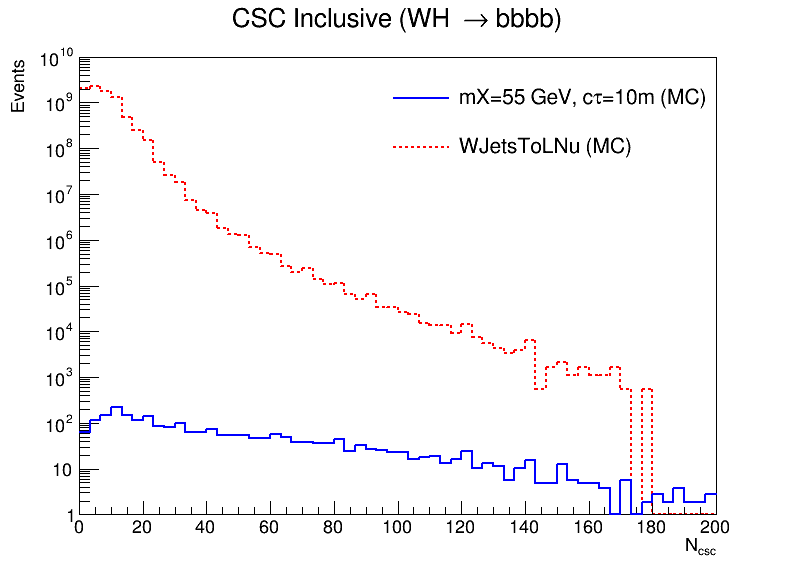

In [250]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)
# h['nCsc_m50ct10m'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(2)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c.SetLogy()

# h['nCsc_m50ct1m'].Scale(1.0/h['nCsc_m50ct1m'].Integral())
# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


# h['nCsc_m50ct1m'].SetLineWidth(1)
h['m55ct10m_wh_bbbb'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
# h['nCsc_zeroBias'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## *N<sub>CSC</sub> Histogram with ME 1/1 and 1/2 Hits Removed*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


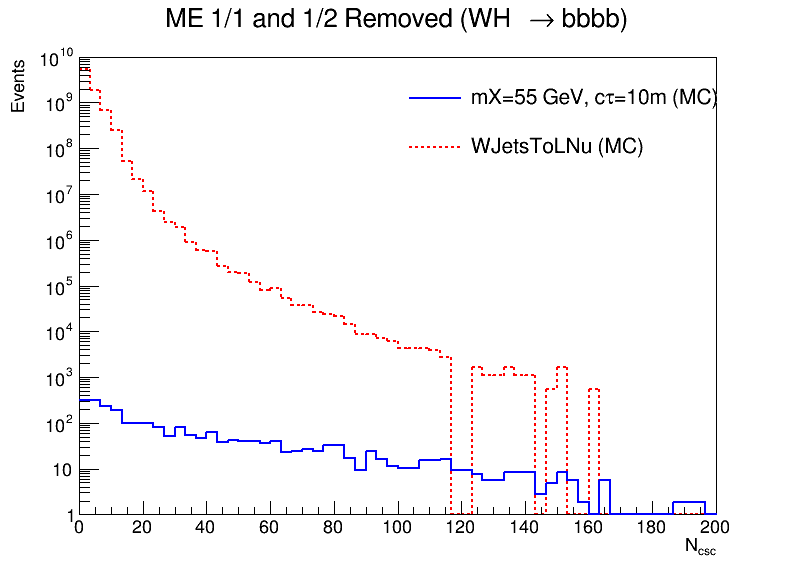

In [251]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c2 = rt.TCanvas('c2','c2', 800, 600)

h['m55ct10m_wh_bbbb_noME112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_noME112', 'Events'], name='m55ct10m_wh_bbbb_noME112', binning=[150,0,500], weights=weight_m55ct10m)
h['m55ct10m_wh_bbbb_noME112'].SetLineColor(4)

h['nCsc_wjets_noME112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_noME112', 'Events'], name='nCsc_wjets_noME112', binning=[150,0,500], weights=weight_WJetsToLNu)
h['nCsc_wjets_noME112'].SetLineColor(2)
h['nCsc_wjets_noME112'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c2.SetLogy()

# h['m55ct10m_wh_bbbb_noME11'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11'].Integral())
# h['nCsc_wjets_noME11'].Scale(1.0/h['nCsc_wjets_noME11'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME112'].SetLineWidth(2)
h['nCsc_wjets_noME112'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['m55ct10m_wh_bbbb_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetYaxis().SetRangeUser(1, 10**10)

# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME112'].SetStats(0)
h['nCsc_wjets_noME112'].SetTitle("ME 1/1 and 1/2 Removed (WH #rightarrow bbbb)")
h['nCsc_wjets_noME112'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME112'].Draw('histo')
# h['m55ct10m_wh_bbbb_noME11'].Draw('histo')
h['m55ct10m_wh_bbbb_noME112'].Draw('histo+same')

# h['nCsc_wjets_noME11'].Draw('histo+same')

# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME112'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME112'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c2.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

## *MET p<sub>T</sub> Distribution*

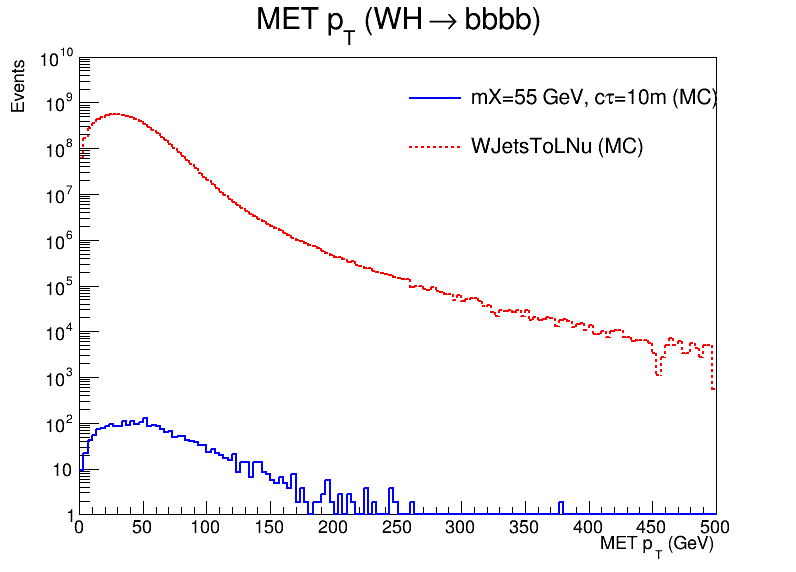

In [252]:
c_met = rt.TCanvas('c_met','c_met', 800, 600)

h['MET_m55ct10m_wh_bbbb'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'], axis_title=['MET_m55ct10m_wh_bbbb', 'Events'], name='MET_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['MET_m55ct10m_wh_bbbb'].SetLineColor(4)

h['MET_WJetsToLNu'] = create_TH1D(met_pt['WJetsToLNu'], axis_title=['MET_WJetsToLNu', 'Events'], name='MET_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['MET_WJetsToLNu'].SetLineColor(2)
h['MET_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['MET_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['MET_WJetsToLNu'].SetStats(0)
h['MET_WJetsToLNu'].SetTitle("MET p_{T} (WH #rightarrow bbbb)")
h['MET_WJetsToLNu'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu'].Draw('histo')
h['MET_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met.Draw()

# k-means Clustering

In [154]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

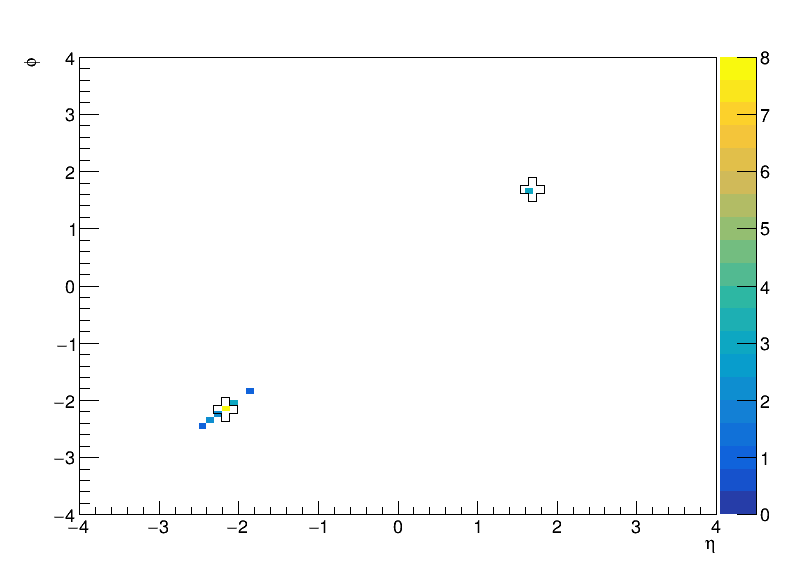

In [155]:
evt_idx = 25

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

In [156]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}

# met_pt_cluster = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
#         centroids, centroid_constituents = kmedians(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
#         met_val = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
#                 met_val += 
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [157]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
        # 310000
        if sel_event > 40000:
            break
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-06 16:35:47.836199-07:00
0: 2019-08-06 16:35:47.849010-07:00
m15ct10m_wh_bbbb: 2019-08-06 16:35:59.202449-07:00
0: 2019-08-06 16:35:59.212719-07:00
1000: 2019-08-06 16:36:11.222495-07:00
2000: 2019-08-06 16:36:23.052404-07:00
m40ct10m_wh_bbbb: 2019-08-06 16:36:24.772295-07:00
0: 2019-08-06 16:36:24.788838-07:00
1000: 2019-08-06 16:36:36.388965-07:00
2000: 2019-08-06 16:36:48.044491-07:00
m55ct10m_wh_bbbb_minus: 2019-08-06 16:36:54.939037-07:00
0: 2019-08-06 16:36:54.952630-07:00
1000: 2019-08-06 16:37:06.701676-07:00
2000: 2019-08-06 16:37:18.306216-07:00
m55ct10m_wh_bbbb_plus: 2019-08-06 16:37:23.115796-07:00
0: 2019-08-06 16:37:23.124796-07:00
1000: 2019-08-06 16:37:32.793084-07:00
2000: 2019-08-06 16:37:42.541442-07:00
3000: 2019-08-06 16:37:52.302942-07:00
4000: 2019-08-06 16:38:01.987865-07:00
5000: 2019-08-06 16:38:11.737757-07:00
6000: 2019-08-06 16:38:21.411955-07:00
7000: 2019-08-06 16:38:31.154646-07:00
8000: 2019-08-06 16:38:40.868557-07:00
9000: 2019-08-06 16

In [162]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [193]:
n_c_total['m55ct10m_wh_bbbb'] = {}
nCsc_cluster['m55ct10m_wh_bbbb'] = {}
for llave in n_c_total['m55ct10m_wh_bbbb_minus'].keys():
    n_c_total['m55ct10m_wh_bbbb'][llave] = np.concatenate([n_c_total['m55ct10m_wh_bbbb_minus'][llave], n_c_total['m55ct10m_wh_bbbb_plus'][llave]])
for cle in nCsc_cluster['m55ct10m_wh_bbbb_minus'].keys():
#     nCsc_cluster['m55ct10m_wh_bbbb'][cle] = {}
#     for kagi in nCsc_cluster['m55ct10m_wh_bbbb'][cle].keys():
    
    nCsc_cluster['m55ct10m_wh_bbbb'][cle] = np.concatenate([nCsc_cluster['m55ct10m_wh_bbbb_minus'][cle], nCsc_cluster['m55ct10m_wh_bbbb_plus'][cle]])

In [196]:
weight_m55ct10m_minus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_minus']['total'])
print(weight_m55ct10m_minus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']))
weight_m55ct10m_minus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']), weight_m55ct10m_minus_cluster)

weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
print(weight_m55ct10m_plus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu_cluster = (61526.7 * 137 * 1000)/len(n_c_total['WJetsToLNu']['total'])
print(weight_WJetsToLNu_cluster)
print(len(n_c_total['WJetsToLNu']['total']))
weight_WJetsToLNu_cluster = np.full(len(n_c_total['WJetsToLNu']['total']), weight_WJetsToLNu_cluster)

9.117165150346954
2594
9.821398006644518
2408
210718.41157942102
40002


In [194]:
print(nCsc_cluster['m55ct10m_wh_bbbb_minus'])

{'csc_inclusive': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME11': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME112': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME1123': array([71., 40.,  7., ..., 49.,  4.,  0.])}


In [163]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_inclusive']))
        eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME11']))
        eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME112']))
        eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    
    # Clustering
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
    rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
    rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
    rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

## *N<sub>CSC</sub> Threshold ROC Curves*

In [176]:
print(eff_ncsc['m55ct10m_wh_bbbb_plus']['cluster'])

{'csc_inclusive': array([0.79111296, 0.79111296, 0.79111296, 0.79111296, 0.72799003,
       0.69684385, 0.67400332, 0.65988372, 0.64576412, 0.625     ,
       0.60423588, 0.58887043, 0.57807309, 0.56270764, 0.55440199,
       0.5423588 , 0.53280731, 0.52408638, 0.51162791, 0.49626246,
       0.47965116, 0.46719269, 0.45805648, 0.44892027, 0.44061462,
       0.4339701 , 0.4269103 , 0.42151163, 0.4127907 , 0.40199336,
       0.39327243, 0.38538206, 0.37832226, 0.37167774, 0.36461794,
       0.35963455, 0.35174419, 0.34468439, 0.33596346, 0.32931894,
       0.32059801, 0.31519934, 0.30813953, 0.3019103 , 0.29817276,
       0.29360465, 0.28862126, 0.285299  , 0.2807309 , 0.27533223,
       0.2711794 , 0.26536545, 0.25996678, 0.25415282, 0.24750831,
       0.24086379, 0.23131229, 0.22549834, 0.21885382, 0.21428571,
       0.20971761, 0.2051495 , 0.1980897 , 0.19601329, 0.1910299 ,
       0.18563123, 0.18272425, 0.17649502, 0.17275748, 0.1673588 ,
       0.16362126, 0.16112957, 0.15614618, 0

In [181]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
# print(eff_ncsc['m55ct10m_wh_bbbb_minus'].keys())
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
#         print(cle)
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


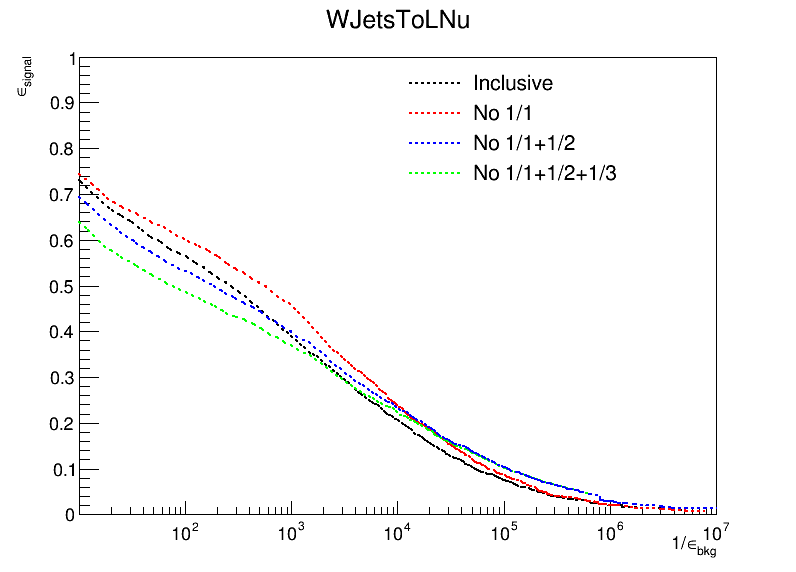

In [182]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10000000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');


legend.Draw();

c3.Draw()

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


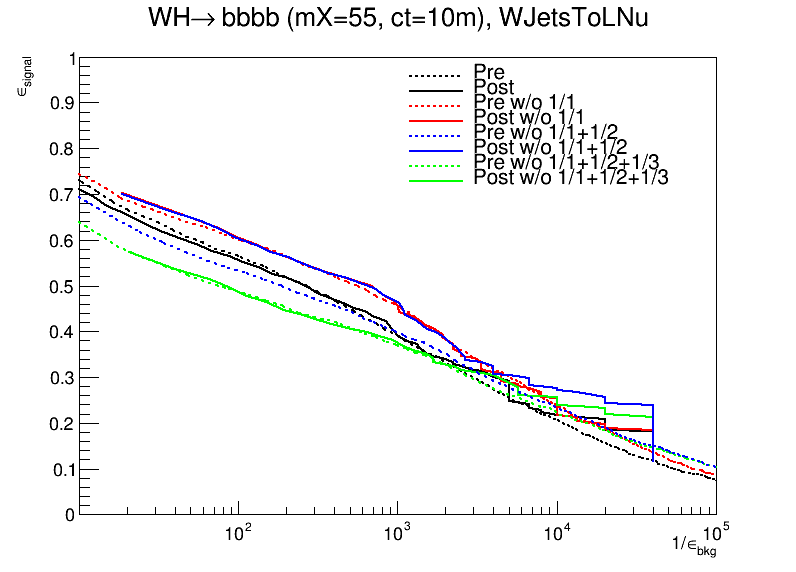

In [183]:
c4 = rt.TCanvas('c4','c4', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_clean_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_res_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_med_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c4.SetLogx()
# c3.SetLogy()

h['roc_curve_noCluster'].SetTitle('WH#rightarrow bbbb (mX=55, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_clean_cluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)

h['roc_curve_res_cluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)

h['roc_curve_med_cluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_cluster'].SetLineStyle(1)
h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_cluster'].SetLineColor(2)
h['roc_curve_clean_cluster'].SetLineStyle(1)
h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_cluster'].SetLineColor(3)
h['roc_curve_res_cluster'].SetLineStyle(1)
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_cluster'].SetLineColor(4)
h['roc_curve_med_cluster'].SetLineStyle(1)
h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 100000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)



h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_clean_cluster'].Draw('same')
h['roc_curve_clean_noCluster'].Draw('same')
h['roc_curve_res_cluster'].Draw('same')
h['roc_curve_med_cluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "Pre w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_clean_cluster'], "Post w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "Pre w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_med_cluster'], "Post w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "Pre w/o 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_res_cluster'], "Post w/o 1/1+1/2+1/3", 'l');


legend.Draw();

c4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb_noME11_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME11_cluster (Potential memory leak).


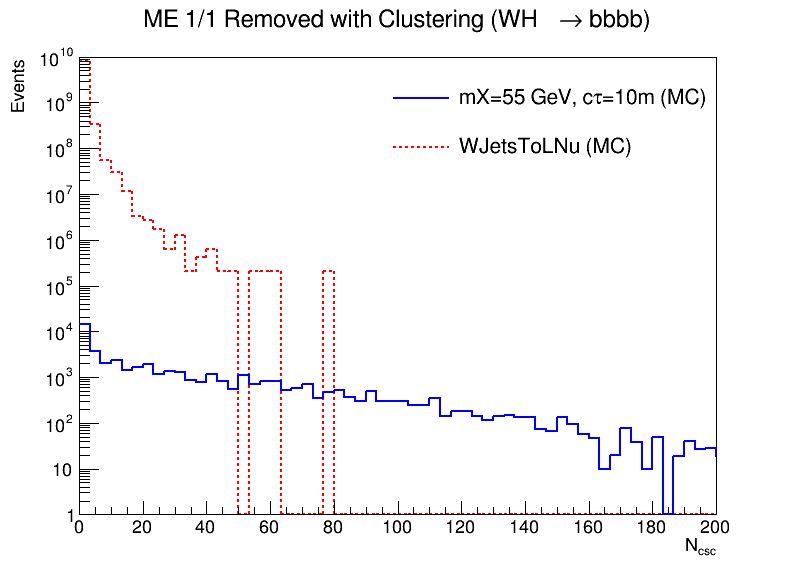

In [198]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c5 = rt.TCanvas('c5','c5', 800, 600)

h['m55ct10m_wh_bbbb_noME11_cluster'] = create_TH1D(nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME11'], axis_title=['m55ct10m_wh_bbbb_noME11_cluster', 'Events'], name='m55ct10m_wh_bbbb_noME11_cluster', binning=[150,0,500], weights = weight_m55ct10m_cluster)
h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineColor(4)

h['nCsc_wjets_noME11_cluster'] = create_TH1D(nCsc_cluster['WJetsToLNu']['csc_noME11'], axis_title=['nCsc_wjets_noME11_cluster', 'Events'], name='nCsc_wjets_noME11_cluster', binning=[150,0,500], weights = weight_WJetsToLNu_cluster)
h['nCsc_wjets_noME11_cluster'].SetLineColor(2)
h['nCsc_wjets_noME11_cluster'].SetLineStyle(2)

c5.SetLogy()

# h['m55ct10m_wh_bbbb_noME11_cluster'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11_cluster'].Integral())
# h['nCsc_wjets_noME11_cluster'].Scale(1.0/h['nCsc_wjets_noME11_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineWidth(2)
h['nCsc_wjets_noME11_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['nCsc_wjets_noME11_cluster'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11_cluster'].SetStats(0)
h['nCsc_wjets_noME11_cluster'].SetTitle("ME 1/1 Removed with Clustering (WH #rightarrow bbbb)")
h['nCsc_wjets_noME11_cluster'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11_cluster'].Draw('histo')
h['m55ct10m_wh_bbbb_noME11_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME11_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c5.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

In [227]:
sel_cluster = {}
for data_type in data_trees.keys():
    sel_cluster[data_type] = np.array(n_c_total[data_type]['total'], dtype=bool)
sel_cluster['m55ct10m_wh_bbbb'] = np.array(n_c_total['m55ct10m_wh_bbbb']['total'], dtype=bool)
print(len(nCsc['m40ct10m_wh_bbbb']))
print(len(n_c_total['m40ct10m_wh_bbbb']['total']))
print(sel_cluster['m55ct10m_wh_bbbb'])
# print(sel_cluster['WJetsToLNu'].astype(int))
print(type(n_c_total['WJetsToLNu']['total']))
print(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])

2146
2146
[ True  True  True ... False  True  True]
<class 'list'>
[4. 6. 4. ... 4. 6. 4.]


In [228]:
weight_m55ct10m_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']])
print(weight_m55ct10m_clusternonZero)
print(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]))
weight_m55ct10m_clusternonZero = np.full(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]), weight_m55ct10m_clusternonZero)

# weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
# print(weight_m55ct10m_plus_cluster)
# print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
# weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

# weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# # weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# # weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# # weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# # weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)
# print(sel_cluster['m55ct10m_wh_bbbb'])
# print(len(n_c_total['WJetsToLNu']['total']))

weight_WJetsToLNu_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])
print(weight_WJetsToLNu_clusternonZero)
print(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]))
weight_WJetsToLNu_clusternonZero = np.full(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]), weight_WJetsToLNu_clusternonZero)

5.928785760842317
3989
2.21877534477906
10659


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met_cluster
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu_cluster (Potential memory leak).


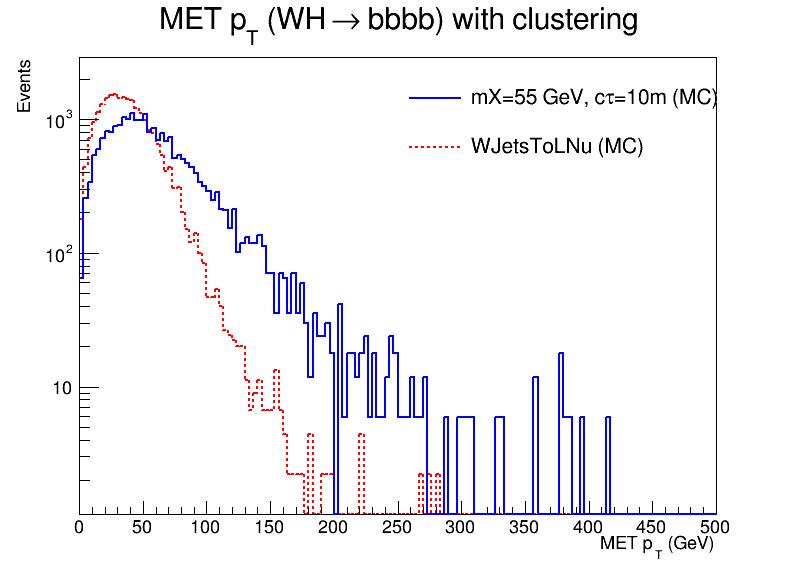

In [234]:
c_met_cluster = rt.TCanvas('c_met_cluster','c_met_cluster', 800, 600)

h['MET_m55ct10m_wh_bbbb_cluster'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'][sel_cluster['m55ct10m_wh_bbbb']], axis_title=['MET_m55ct10m_wh_bbbb_cluster', 'Events'], name='MET_m55ct10m_wh_bbbb_cluster', binning=[150,0,500], weights=weight_m55ct10m_clusternonZero)
h['MET_m55ct10m_wh_bbbb_cluster'].SetLineColor(4)

h['MET_WJetsToLNu_cluster'] = create_TH1D(met_pt['WJetsToLNu'][:len(sel_cluster['WJetsToLNu'])][sel_cluster['WJetsToLNu']], axis_title=['MET_WJetsToLNu_cluster', 'Events'], name='MET_WJetsToLNu_cluster', binning=[150,0,500], weights = weight_WJetsToLNu_clusternonZero)
h['MET_WJetsToLNu_cluster'].SetLineColor(2)
h['MET_WJetsToLNu_cluster'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met_cluster.SetLogy()

# h['MET_m55ct10m_wh_bbbb_cluster'].Scale(1.0/h['MET_m55ct10m_wh_bbbb_cluster'].Integral())
# h['MET_WJetsToLNu_cluster'].Scale(1.0/h['MET_WJetsToLNu_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)
h['MET_WJetsToLNu_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_WJetsToLNu_cluster'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu_cluster'].GetYaxis().SetRangeUser(1,10**10)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['MET_WJetsToLNu_cluster'].SetStats(0)
h['MET_WJetsToLNu_cluster'].SetTitle("MET p_{T} (WH #rightarrow bbbb) with clustering")
h['MET_WJetsToLNu_cluster'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu_cluster'].Draw('histo')
h['MET_m55ct10m_wh_bbbb_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met_cluster.Draw()